In [1]:
# All libraries
import jetset
print('tested on jetset',jetset.__version__)
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from jetset.data_loader import Data
from jetset.data_loader import ObsData
from jetset.plot_sedfit import PlotSED
from jetset.jet_model import Jet
from jetset.minimizer import fit_SED,ModelMinimizer
from jetset.model_manager import  FitModel
from jetset.sed_shaper import  SEDShape
from jetset.obs_constrain import ObsConstrain
from jetset.minimizer import fit_SED
from jetset.template_2Dmodel import EBLAbsorptionTemplate
from jetset.mcmc import McmcSampler
sed_data=ObsData.load('J163547_data.pkl')

tested on jetset 1.2.2


# Unraveling the SMBH and its Nuclear Environment in NVSS J163547+362930 in the Early Universe

==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5


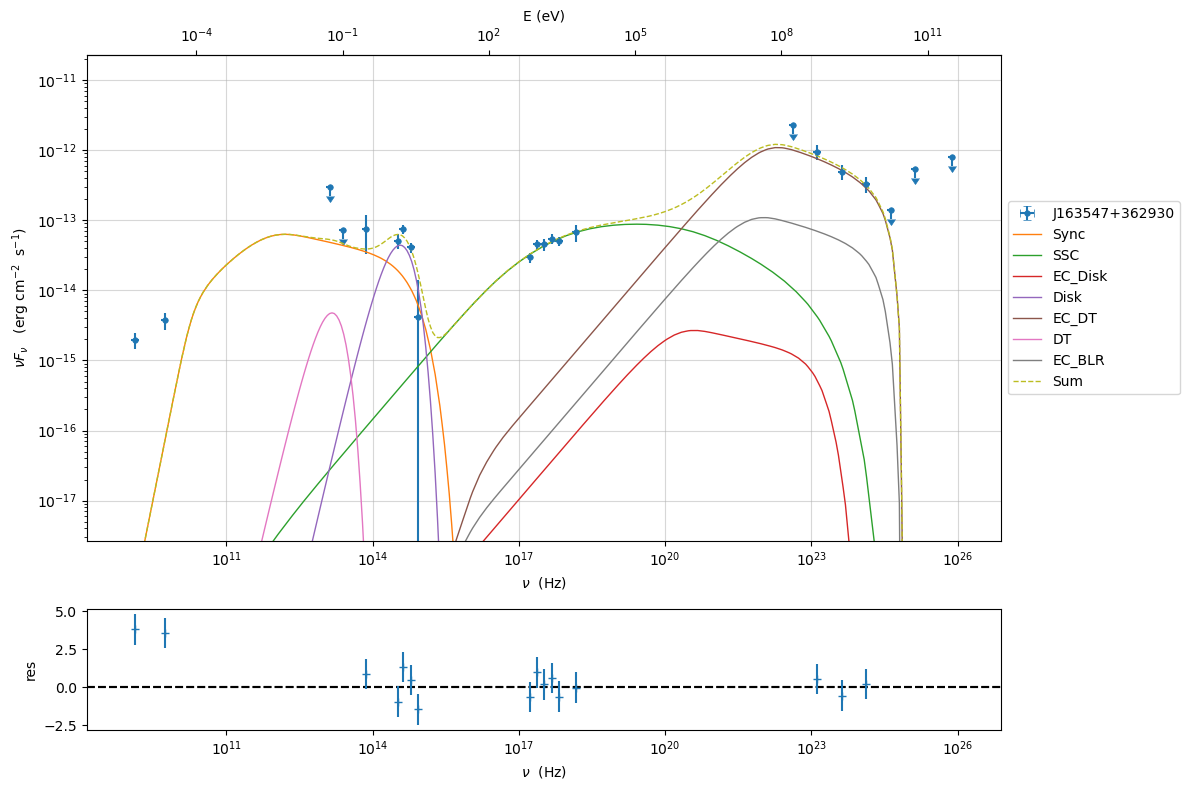

In [3]:
prefit_jet=Jet(name='jet_leptonic',electron_distribution='bkn',beaming_expr='bulk_theta')
prefit_jet.add_EC_component(['EC_Disk',"EC_DT","EC_BLR"],disk_type='MultiBB')
prefit_jet.add_user_par(name='theta_open',val=3,units='deg')
prefit_jet.make_dependent_par(par='R', depends_on=['R_H','theta_open'],
                              par_expr='np.tan((theta_open*np.pi/180))*R_H')
prefit_jet.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='3E17*(L_Disk/1E46)**0.5')
prefit_jet.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')
prefit_jet.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2E19*(L_Disk/1E46)**0.5')

gmin=1.00
gmax=20000.00
N=702.2429
gamma_break=823.9845
p=1.374243
p_1=3.30019
T_DT=836.6683
R_DT=2.364663e+19
tau_DT=0.1
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.083
M_BH=999404000
tau_BLR=0.1
#R_BLR_in=3.546995e+17
#R_BLR_out=3.901695e+17
L_Disk=1.397908e+46
#R=7.878364e+16
R_H=1.503281e+18
B=0.06719232
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3

prefit_jet.set_par('gmin',val=gmin)
prefit_jet.set_par('gmax',val=gmax)
prefit_jet.set_par('N',val=N)
prefit_jet.set_par('gamma_break',val=gamma_break)
prefit_jet.set_par('p',val=p)
prefit_jet.set_par('p_1',val=p_1)
prefit_jet.set_par('R_inner_Sw',val=R_inner_Sw)
prefit_jet.set_par('R_ext_Sw',val=R_ext_Sw)
prefit_jet.set_par('accr_eff',val=accr_eff)
prefit_jet.set_par('M_BH',val=M_BH)
prefit_jet.set_par('T_DT',val=T_DT)
prefit_jet.set_par('tau_DT',val=tau_DT)
prefit_jet.set_par('tau_BLR',val=tau_BLR)
prefit_jet.set_par('L_Disk',val=L_Disk)
prefit_jet.set_par('R_H',val=R_H)
prefit_jet.set_par('B',val=B)
prefit_jet.set_par('theta',val=theta)
prefit_jet.set_par('theta',val=theta_open)
prefit_jet.set_par('BulkFactor',val=BulkFactor)
prefit_jet.set_par('z_cosm',val=z_cosm)
prefit_jet.eval()
p=prefit_jet.plot_model(sed_data=sed_data, frame='obs')
p.add_residual_plot(prefit_jet,sed_data)

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H



--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 1.000000e+00
 gmax grid : 2.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e-01

accretion disk:
 disk Type: MultiBB
 L disk: 9.785356e+45 (erg/s)
 T disk: 2.751217e+04 (K)
 nu peak disk: 2.248243e+15 (Hz)
 Sw radius 2.951779e+14 (cm)
 L Edd. 1.665730e+47 (erg/s)
 accr_rate: 3.028544e+00 (M_sun/yr)
 accr_rate Edd.: 5.155394e+01 (M_sun/yr)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_Disk, state: on
   name:Disk, state: on
   name:EC_DT, state: on


--------------------------------------------------------------------------------


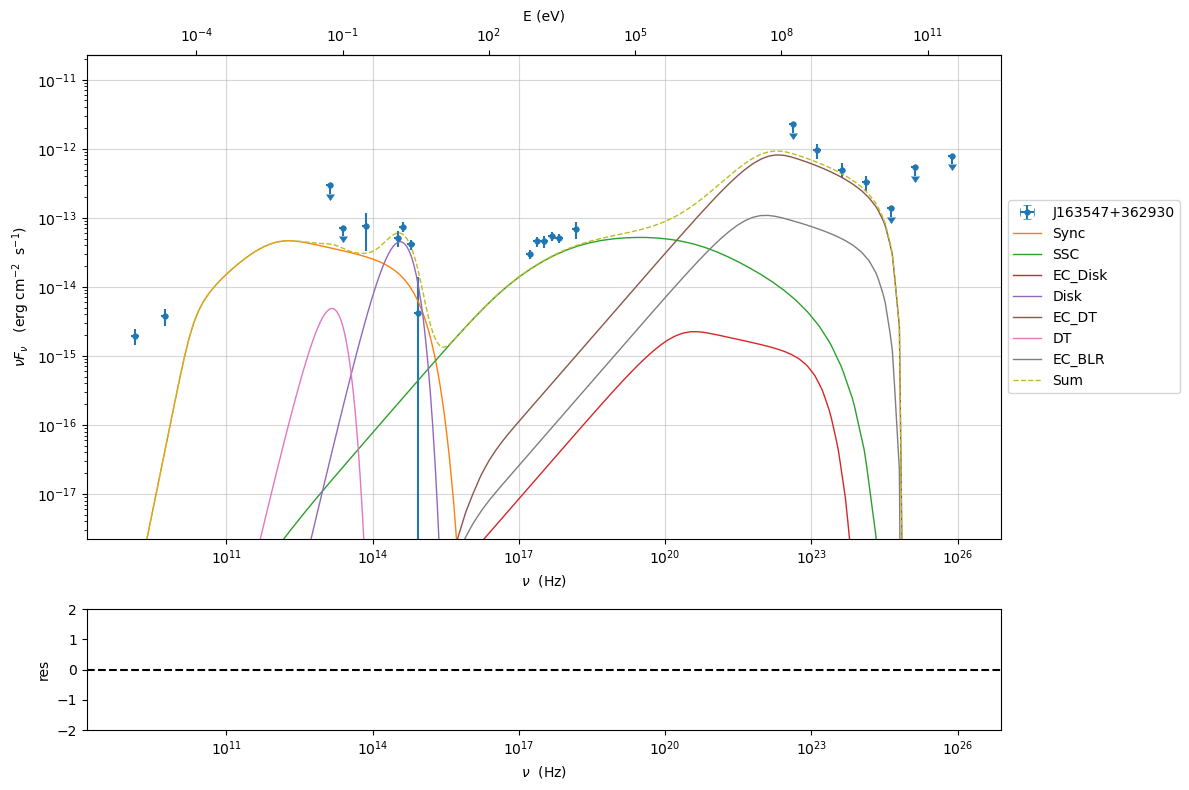

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.61495e+01

fit run: 1
- old chisq=3.61495e+01


0it [00:00, ?it/s]

- best chisq=3.61481e+01

fit run: 2
- old chisq=3.61481e+01


0it [00:00, ?it/s]

- best chisq=3.59539e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.057$



converged=True
calls=2799
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.95                      │             Nfcn = 2799              │
│ EDM = 50.1 (Goal: 0.0002)        │           time = 850.9 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│NOT pos. def.│   FORCED   │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    820    │    80     │            │            │   100   │  2000   │       │
│ 1 │ par_1 │  0.81e3   │  0.11e3   │            │            │   500   │  1000   │       │
│ 2 │ par_2 │   1.304   │   0.031   │            │            │   1.3   │   1.5   │       │
│ 3 │ par_3 │    3.3    │    0.4    │            │            │   3.3   │   3.8   │       │
│ 4 │ par_4 │  1.06e9   │  0.17e9   │            │            │  9e+08  │  2e+09  │       │
│ 5 │ par_5 │ 10.84e45  │  0.19e45  │            │            │  8e+45  │  8e+46  │       │
│ 6 │ par_6 │  1.22e18  │  0.07e18  │            │            │  1e+18  │  3e+18  │       │
│ 7 │ par_7 │   0.067   │   0.016   │            │            │  0.02   │   0.1   │       │
│ 8 │ par_8 │   19.3    │    1.1    │            │            │   15    │   25    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  5.83e+03  3.28e+03    -0.279     -15.2  1.18e+09 -7.81e+45 -2.89e+18    -0.852     -49.1 │
│ par_1 │  3.28e+03  1.23e+04     -1.05     -32.9  5.19e+09  -1.8e+46 -6.64e+18     -1.54     -82.2 │
│ par_2 │    -0.279     -1.05   0.00054   0.00482  -4.2e+05   2.5e+42  9.26e+14  0.000264    0.0151 │
│ par_3 │     -15.2     -32.9   0.00482     0.143 -2.68e+07  7.03e+43   2.6e+16   0.00539     0.276 │
│ par_4 │  1.18e+09  5.19e+09  -4.2e+05 -2.68e+07  3.11e+16 -1.26e+52  -4.7e+24 -5.85e+05 -1.51e+07 │
│ par_5 │ -7.81e+45  -1.8e+46   2.5e+42  7.03e+43 -1.26e+52  3.66e+88  1.33e+61   2.8e+42   1.4e+44 │
│ par_6 │ -2.89e+18 -6.64e+18  9.26e+14   2.6e+16  -4.7e+24  1.33e+61  4.94e+33  1.03e+15  5.16e+16 │
│ par_7 │    -0.852     -1.54  0.000264   0.00539 -5.85e+05   2.8e+42  1.03e+15  0.000282    0.0161 │
│ par_8 │     -49.1     -82.2    0.0151     0.276 -1.51e+07   1.4e+44  5.16e+16    0.0161      1.19 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=35.953853, chisq/red=2.765681 null hypothesis sig=0.000603

stats without the UL
dof  UL=7
chisq=35.846696, chisq/red=5.120957 null hypothesis sig=0.000008


best fit pars


-------------------------------------------------------------------------


19.106361330559107


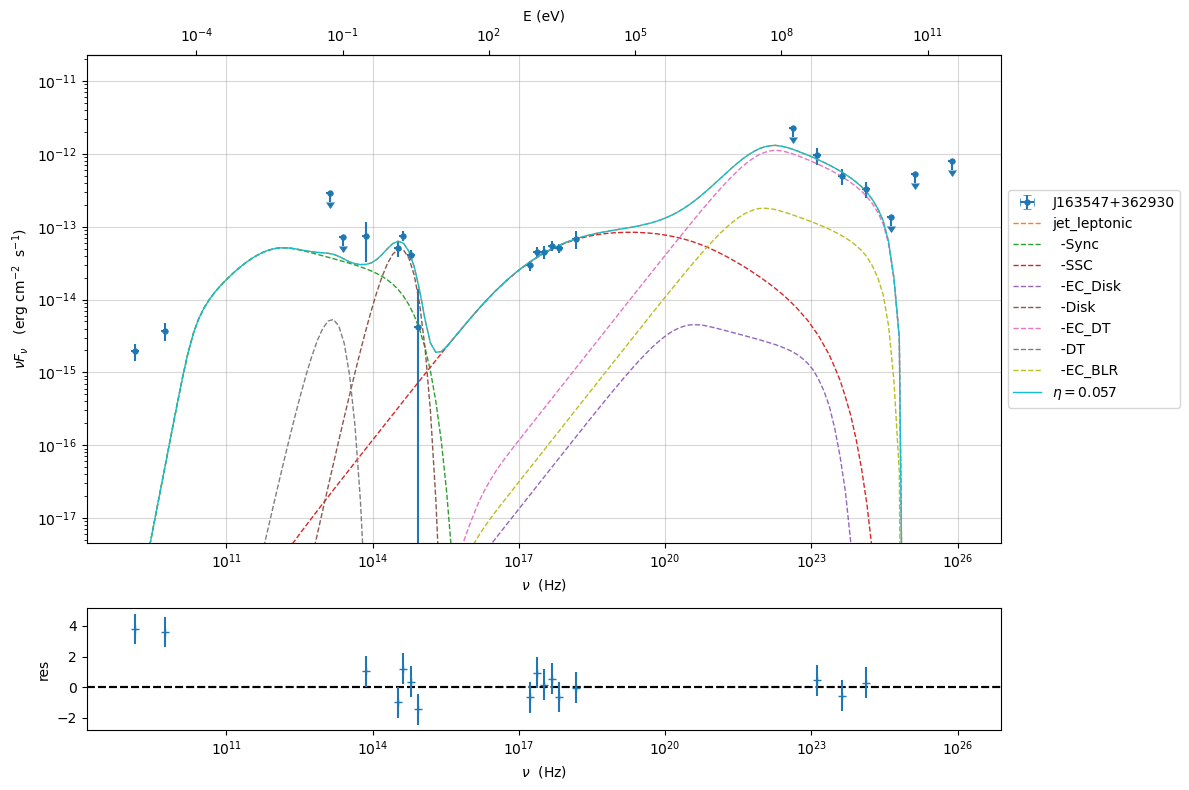

In [71]:
jet_5=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_5.set_par('accr_eff',val=0.057)
jet_5.set_par('L_Disk',val=L_Disk*0.7)
jet_5.set_par('R_H',val=R_H*0.8)
jet_5.set_par('B',val=B*1.2)

jet_5.eval()
jet_5.show_model()

p=jet_5.plot_model(sed_data=sed_data)
plt.show()

fit_model_5=FitModel(jet=jet_5, name=r'$\eta = 0.057$',template=None)

fit_model_5.free('jet_leptonic','R_H')
#fit_model_5.freeze('jet_leptonic','B')
fit_model_5.freeze('jet_leptonic','theta')
fit_model_5.freeze('jet_leptonic','theta_open')
#fit_model_5.freeze('jet_leptonic','BulkFactor')
fit_model_5.freeze('jet_leptonic','z_cosm')
fit_model_5.freeze('jet_leptonic','gmin')
fit_model_5.freeze('jet_leptonic','gmax')
#fit_model_5.freeze('jet_leptonic','N')
#fit_model_5.freeze('jet_leptonic','gamma_break')
#fit_model_5.freeze('jet_leptonic','p')
#fit_model_5.freeze('jet_leptonic','p_1')
fit_model_5.freeze('jet_leptonic','R_inner_Sw')
fit_model_5.freeze('jet_leptonic','R_ext_Sw')
fit_model_5.freeze('jet_leptonic','accr_eff')
#fit_model_5.freeze('jet_leptonic','M_BH')
fit_model_5.freeze('jet_leptonic','T_DT')
#fit_model_5.freeze('jet_leptonic','L_Disk')
fit_model_5.freeze('jet_leptonic','tau_BLR')
fit_model_5.freeze('jet_leptonic','tau_DT')

#fit_model_5.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,2.0e+00]
#fit_model_5.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_5.jet_leptonic.parameters.N.fit_range=[1.00e+02,2.00e+03]
fit_model_5.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_5.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.50e+00]
fit_model_5.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_5.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_5.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_5.jet_leptonic.parameters.M_BH.fit_range=[9.0000e+08,2.000e+9]
#fit_model_5.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_5.jet_leptonic.parameters.L_Disk.fit_range=[8.00e45,8.00e46]
fit_model_5.jet_leptonic.parameters.R_H.fit_range=[1.00e18,3.00e18]
fit_model_5.jet_leptonic.parameters.B.fit_range=[0.020,0.100]
fit_model_5.jet_leptonic.parameters.BulkFactor.fit_range=[15.00,25.00]


fit_model_5.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_5,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.057$',repeat=3, use_UL=True)
fit_model_5.eval()
best_fit_minuit.save_report('Report_best_fit_model_5_1.pkl')
fit_model_5.save_model('fit_model_5_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_5_1.pkl')
#fit_model_5.show_model()
#fit_model_5.jet_leptonic.energetic_report()
p2=fit_model_5.plot_model(sed_data=sed_data)
#p2.save('fit_model_5.png')
print(fit_model_5.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H



--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 1.000000e+00
 gmax grid : 2.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e-01

accretion disk:
 disk Type: MultiBB
 L disk: 1.957071e+46 (erg/s)
 T disk: 2.842832e+04 (K)
 nu peak disk: 2.323108e+15 (Hz)
 Sw radius 2.951779e+14 (cm)
 L Edd. 1.665730e+47 (erg/s)
 accr_rate: 3.452541e+00 (M_sun/yr)
 accr_rate Edd.: 2.938575e+01 (M_sun/yr)

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
   name:EC_Disk, state: on
   name:Disk, state: on
   name:EC_DT, state: on


--------------------------------------------------------------------------------


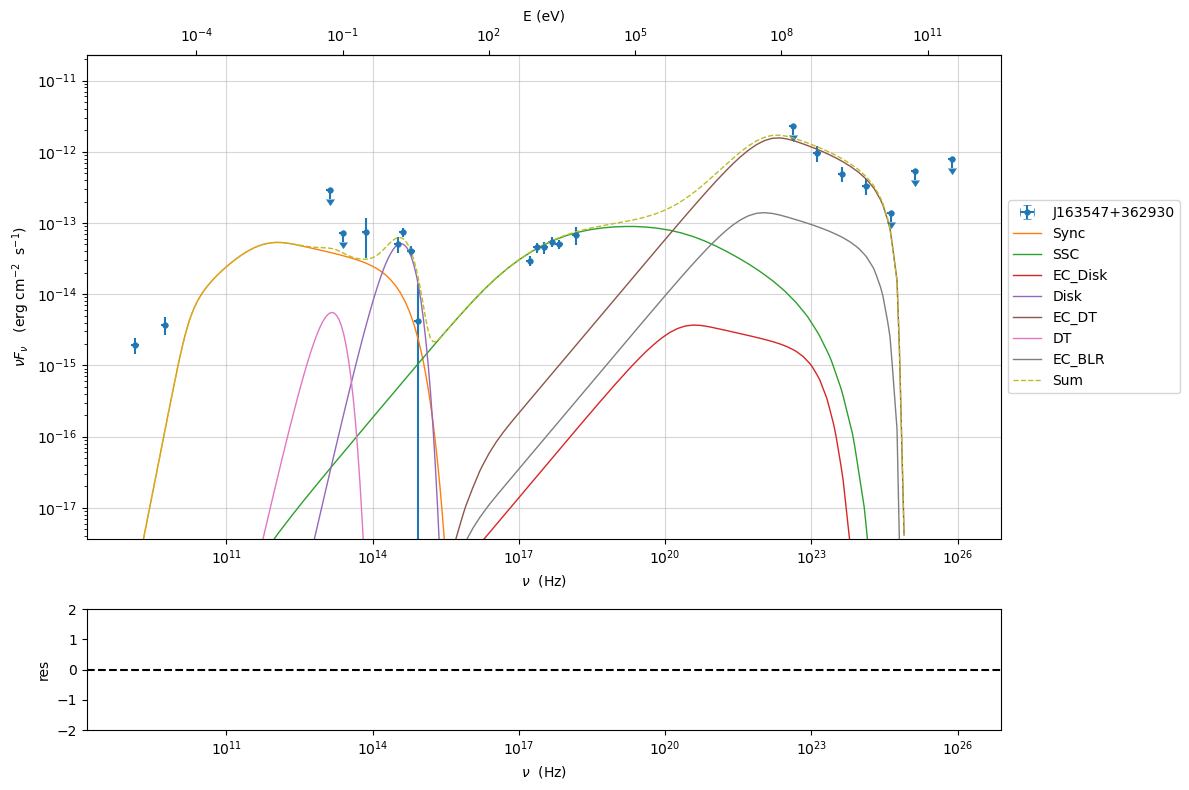

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.51744e+01

fit run: 1
- old chisq=3.51744e+01


0it [00:00, ?it/s]

- best chisq=3.51190e+01

fit run: 2
- old chisq=3.51190e+01


0it [00:00, ?it/s]

- best chisq=3.51190e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.100$



converged=True
calls=316
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 35.12                      │              Nfcn = 316              │
│ EDM = 0.035 (Goal: 0.0002)       │           time = 95.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    442    │    23     │            │            │   100   │  2000   │       │
│ 1 │ par_1 │    880    │    50     │            │            │   500   │  1000   │       │
│ 2 │ par_2 │   1.311   │   0.012   │            │            │   1.3   │   1.5   │       │
│ 3 │ par_3 │   3.33    │   0.35    │            │            │   3.3   │   3.8   │       │
│ 4 │ par_4 │  1.087e9  │  0.005e9  │            │            │  9e+08  │  2e+09  │       │
│ 5 │ par_5 │ 19.923e45 │ 0.009e45  │            │            │  8e+45  │  8e+46  │       │
│ 6 │ par_6 │ 1.8238e18 │ 0.0013e18 │            │            │  1e+18  │  3e+18  │       │
│ 7 │ par_7 │   0.049   │   0.006   │            │            │  0.02   │   0.1   │       │
│ 8 │ par_8 │    18     │     6     │            │            │   15    │   25    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │       504      -366    0.0759      1.17 -4.55e+05  3.87e+43  5.78e+15    0.0047     -36.5 │
│ par_1 │      -366   2.6e+03      0.17      -6.6  1.66e+06 -2.62e+44 -3.91e+16    -0.186       232 │
│ par_2 │    0.0759      0.17  0.000147  -0.00042       190 -1.29e+40 -1.92e+12  2.16e-06    0.0125 │
│ par_3 │      1.17      -6.6  -0.00042    0.0608 -1.58e+04     2e+42  2.98e+14   0.00122     -1.79 │
│ par_4 │ -4.55e+05  1.66e+06       190 -1.58e+04  2.65e+13 -5.14e+47 -7.67e+19      -256  4.65e+05 │
│ par_5 │  3.87e+43 -2.62e+44 -1.29e+40     2e+42 -5.14e+47  7.29e+85  1.08e+58   4.4e+40 -6.69e+43 │
│ par_6 │  5.78e+15 -3.91e+16 -1.92e+12  2.98e+14 -7.67e+19  1.08e+58  1.62e+30  6.56e+12 -9.98e+15 │
│ par_7 │    0.0047    -0.186  2.16e-06   0.00122      -256   4.4e+40  6.56e+12  3.44e-05   -0.0396 │
│ par_8 │     -36.5       232    0.0125     -1.79  4.65e+05 -6.69e+43 -9.98e+15   -0.0396      63.5 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=35.118957, chisq/red=2.701458 null hypothesis sig=0.000812

stats without the UL
dof  UL=7
chisq=34.990052, chisq/red=4.998579 null hypothesis sig=0.000011


best fit pars


-------------------------------------------------------------------------


19.075112213929234


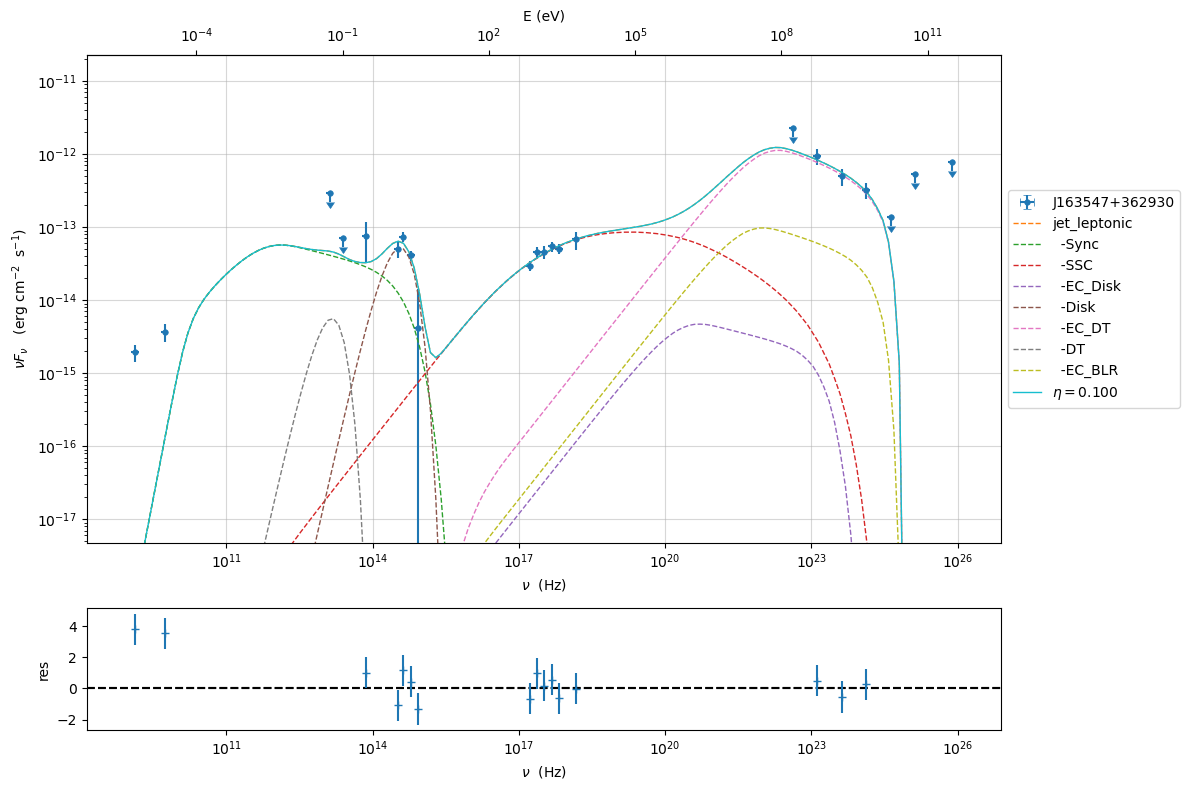

In [79]:
jet_1=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_1.set_par('accr_eff',val=0.100)
jet_1.set_par('L_Disk',val=L_Disk*1.4)
jet_1.set_par('R_H',val=R_H*1.2)
jet_1.set_par('B',val=B*0.7)

jet_1.eval()
jet_1.show_model()

p=jet_1.plot_model(sed_data=sed_data)
plt.show()

fit_model_1=FitModel(jet=jet_1, name=r'$\eta = 0.100$',template=None)

fit_model_1.free('jet_leptonic','R_H')
#fit_model_1.freeze('jet_leptonic','B')
fit_model_1.freeze('jet_leptonic','theta')
fit_model_1.freeze('jet_leptonic','theta_open')
#fit_model_1.freeze('jet_leptonic','BulkFactor')
fit_model_1.freeze('jet_leptonic','z_cosm')
fit_model_1.freeze('jet_leptonic','gmin')
fit_model_1.freeze('jet_leptonic','gmax')
#fit_model_1.freeze('jet_leptonic','N')
#fit_model_1.freeze('jet_leptonic','gamma_break')
#fit_model_1.freeze('jet_leptonic','p')
#fit_model_1.freeze('jet_leptonic','p_1')
fit_model_1.freeze('jet_leptonic','R_inner_Sw')
fit_model_1.freeze('jet_leptonic','R_ext_Sw')
fit_model_1.freeze('jet_leptonic','accr_eff')
#fit_model_1.freeze('jet_leptonic','M_BH')
fit_model_1.freeze('jet_leptonic','T_DT')
#fit_model_1.freeze('jet_leptonic','L_Disk')
fit_model_1.freeze('jet_leptonic','tau_BLR')
fit_model_1.freeze('jet_leptonic','tau_DT')

#fit_model_1.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,2.0e+00]
#fit_model_1.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_1.jet_leptonic.parameters.N.fit_range=[1.00e+02,2.00e+03]
fit_model_1.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_1.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.50e+00]
fit_model_1.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_1.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_1.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_1.jet_leptonic.parameters.M_BH.fit_range=[9.0000e+08,2.000e+9]
#fit_model_1.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_1.jet_leptonic.parameters.L_Disk.fit_range=[8.00e45,8.00e46]
fit_model_1.jet_leptonic.parameters.R_H.fit_range=[1.00e18,3.00e18]
fit_model_1.jet_leptonic.parameters.B.fit_range=[0.020,0.100]
fit_model_1.jet_leptonic.parameters.BulkFactor.fit_range=[15.00,25.00]


fit_model_1.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_1,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.100$',repeat=3, use_UL=True)
fit_model_1.eval()
best_fit_minuit.save_report('Report_best_fit_model_1_1.pkl')
fit_model_1.save_model('fit_model_1_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_1_1.pkl')
#fit_model_1.show_model()
#fit_model_1.jet_leptonic.energetic_report()
p2=fit_model_1.plot_model(sed_data=sed_data)
#p2.save('fit_model_1.png')
print(fit_model_1.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


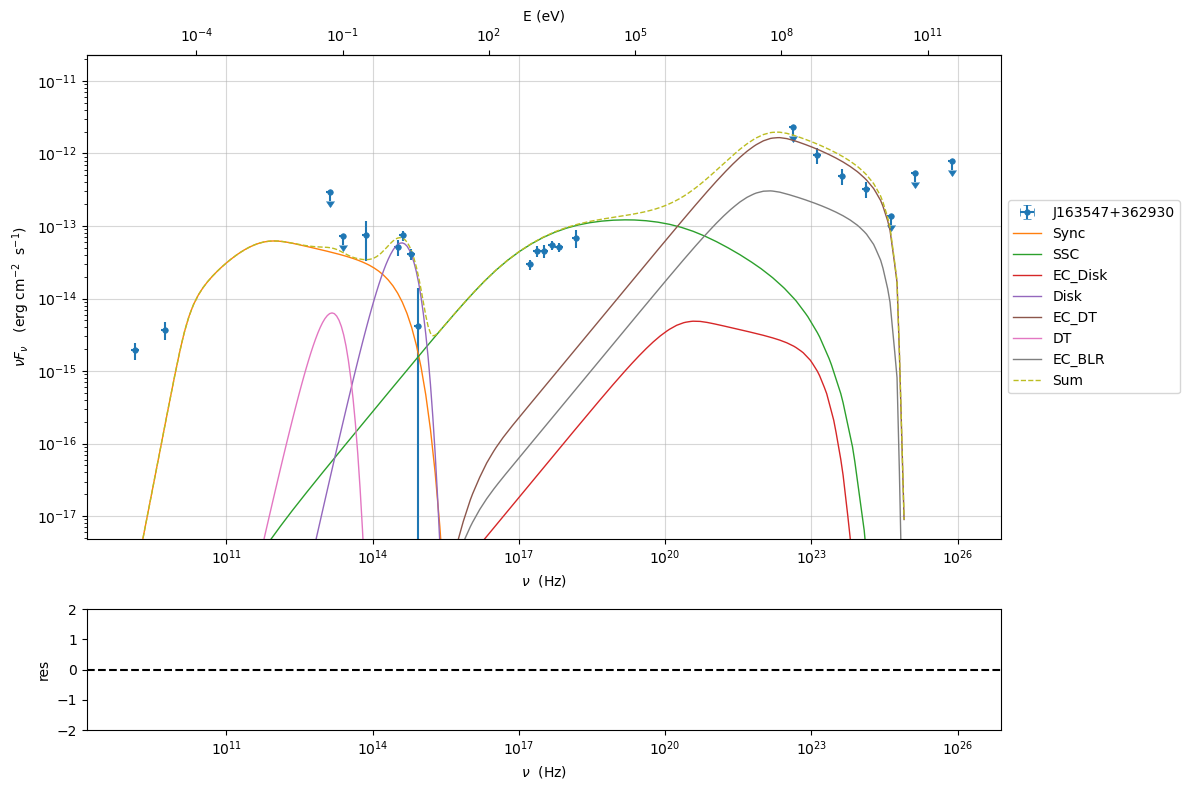

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.49905e+01

fit run: 1
- old chisq=3.49905e+01


0it [00:00, ?it/s]

- best chisq=3.48560e+01

fit run: 2
- old chisq=3.48560e+01


0it [00:00, ?it/s]

- best chisq=3.45915e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.150$



converged=True
calls=975
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.59                      │              Nfcn = 975              │
│ EDM = 0.00474 (Goal: 0.0002)     │           time = 294.7 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │  0.39e3   │  0.15e3   │            │            │   100   │  2000   │       │
│ 1 │ par_1 │   1.0e3   │   0.4e3   │            │            │   500   │  1000   │       │
│ 2 │ par_2 │   1.30    │   0.13    │            │            │   1.3   │   1.5   │       │
│ 3 │ par_3 │   3.37    │   0.27    │            │            │   3.3   │   3.8   │       │
│ 4 │ par_4 │  1.15e9   │  0.06e9   │            │            │  9e+08  │  2e+09  │       │
│ 5 │ par_5 │33.5133e45 │ 0.0024e45 │            │            │  8e+45  │  8e+46  │       │
│ 6 │ par_6 │2.104542e18│0.000006e18│            │            │  1e+18  │  3e+18  │       │
│ 7 │ par_7 │   0.036   │   0.017   │            │            │  0.02   │   0.1   │       │
│ 8 │ par_8 │    17     │     6     │            │            │   15    │   25    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  2.17e+04 -1.27e+03     0.153     -16.3 -1.14e+09 -2.55e+44  1.86e+13     -2.35      -597 │
│ par_1 │ -1.27e+03     3e+04    0.0344      10.8   2.4e+09 -1.52e+44 -2.64e+14        -1      -254 │
│ par_2 │     0.153    0.0344  1.05e-05 -0.000269 -2.91e+04 -1.28e+39  3.18e+09 -1.92e-05  -0.00733 │
│ par_3 │     -16.3      10.8 -0.000269    0.0544  3.93e+06 -8.64e+39 -7.34e+11   0.00182     0.933 │
│ par_4 │ -1.14e+09   2.4e+09 -2.91e+04  3.93e+06  3.22e+15 -3.42e+49 -1.36e+20  5.72e+04  8.35e+07 │
│ par_5 │ -2.55e+44 -1.52e+44 -1.28e+39 -8.64e+39 -3.42e+49  5.58e+84  1.02e+55   3.2e+40  6.25e+42 │
│ par_6 │  1.86e+13 -2.64e+14  3.18e+09 -7.34e+11 -1.36e+20  1.02e+55   3.5e+25 -4.11e+08 -8.11e+12 │
│ par_7 │     -2.35        -1 -1.92e-05   0.00182  5.72e+04   3.2e+40 -4.11e+08  0.000307    0.0821 │
│ par_8 │      -597      -254  -0.00733     0.933  8.35e+07  6.25e+42 -8.11e+12    0.0821      28.9 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=34.591518, chisq/red=2.660886 null hypothesis sig=0.000978

stats without the UL
dof  UL=7
chisq=34.510068, chisq/red=4.930010 null hypothesis sig=0.000014


best fit pars


-------------------------------------------------------------------------


19.008601280849362


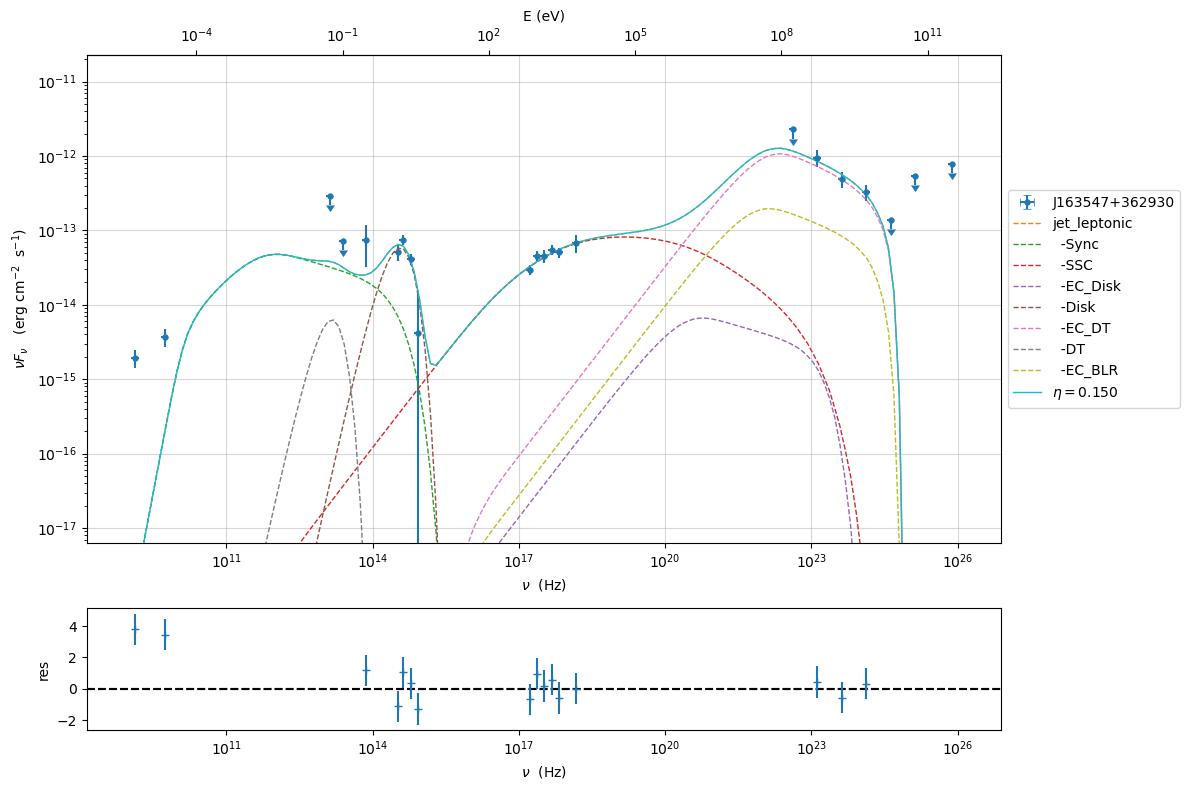

In [96]:
jet_1_5=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_1_5.set_par('accr_eff',val=0.150)
jet_1_5.set_par('L_Disk',val=L_Disk*2.4)
jet_1_5.set_par('R_H',val=R_H*1.4)
jet_1_5.set_par('B',val=B*0.6)

jet_1_5.eval()
#jet_1_5.show_model()

p=jet_1_5.plot_model(sed_data=sed_data)
plt.show()
#print(js)

fit_model_1_5_5=FitModel(jet=jet_1_5, name=r'$\eta = 0.150$',template=None)

fit_model_1_5.free('jet_leptonic','R_H')
fit_model_1_5.free('jet_leptonic','BulkFactor')
#fit_model_1_5.freeze('jet_leptonic','B')
fit_model_1_5.freeze('jet_leptonic','theta')
fit_model_1_5.freeze('jet_leptonic','theta_open')
#fit_model_1_5.freeze('jet_leptonic','BulkFactor')
fit_model_1_5.freeze('jet_leptonic','z_cosm')
fit_model_1_5.freeze('jet_leptonic','gmin')
fit_model_1_5.freeze('jet_leptonic','gmax')
#fit_model_1_5.freeze('jet_leptonic','N')
#fit_model_1_5.freeze('jet_leptonic','gamma_break')
#fit_model_1_5.freeze('jet_leptonic','p')
#fit_model_1_5.freeze('jet_leptonic','p_1')
fit_model_1_5.freeze('jet_leptonic','R_inner_Sw')
fit_model_1_5.freeze('jet_leptonic','R_ext_Sw')
fit_model_1_5.freeze('jet_leptonic','accr_eff')
#fit_model_1_5.freeze('jet_leptonic','M_BH')
fit_model_1_5.freeze('jet_leptonic','T_DT')
#fit_model_1_5.freeze('jet_leptonic','L_Disk')
fit_model_1_5.freeze('jet_leptonic','tau_BLR')
fit_model_1_5.freeze('jet_leptonic','tau_DT')

#fit_model_1_5.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,2.0e+00]
#fit_model_1_5.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_1_5.jet_leptonic.parameters.N.fit_range=[1.00e+02,2.00e+03]
fit_model_1_5.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_1_5.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.50e+00]
fit_model_1_5.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_1_5.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_1_5.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_1_5.jet_leptonic.parameters.M_BH.fit_range=[9.0000e+08,2.000e+9]
#fit_model_1_5.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_1_5.jet_leptonic.parameters.L_Disk.fit_range=[8.00e45,8.00e46]
fit_model_1_5.jet_leptonic.parameters.R_H.fit_range=[1.00e18,3.00e18]
fit_model_1_5.jet_leptonic.parameters.B.fit_range=[0.020,0.100]
fit_model_1_5.jet_leptonic.parameters.BulkFactor.fit_range=[15.00,25.00]


fit_model_1_5.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_1_5,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.150$',repeat=3, use_UL=True)
fit_model_1_5.eval()
best_fit_minuit.save_report('Report_best_fit_model_1_5_1.pkl')
fit_model_1_5.save_model('fit_model_1_5_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_1_5_1.pkl')
#fit_model_1_5.show_model()
#fit_model_1_5.jet_leptonic.energetic_report()
p2=fit_model_1_5.plot_model(sed_data=sed_data)
#p2.save('fit_model_1_5.png')
print(fit_model_1_5.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


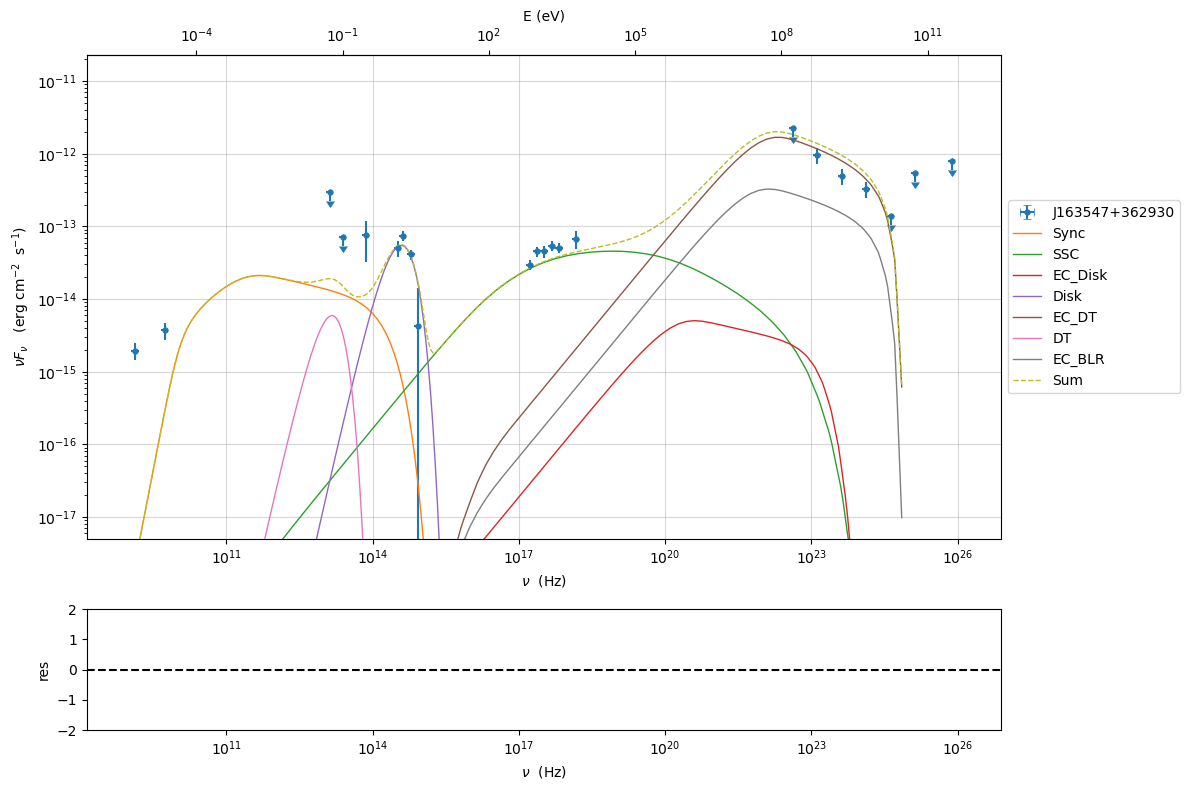

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.44617e+01

fit run: 1
- old chisq=3.44617e+01


0it [00:00, ?it/s]

- best chisq=3.44221e+01

fit run: 2
- old chisq=3.44221e+01


0it [00:00, ?it/s]

- best chisq=3.44167e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.200$



converged=True
calls=638
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 34.42                      │              Nfcn = 638              │
│ EDM = 0.0913 (Goal: 0.0002)      │           time = 191.8 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │    464    │    22     │            │            │   100   │  2000   │       │
│ 1 │ par_1 │    980    │    50     │            │            │   500   │  1000   │       │
│ 2 │ par_2 │   1.408   │   0.011   │            │            │   1.3   │   1.5   │       │
│ 3 │ par_3 │   3.32    │   0.08    │            │            │   3.3   │   3.8   │       │
│ 4 │ par_4 │  1.11e9   │  0.16e9   │            │            │  9e+08  │  2e+09  │       │
│ 5 │ par_5 │ 41.94e45  │  0.12e45  │            │            │  8e+45  │  8e+46  │       │
│ 6 │ par_6 │ 2.3306e18 │ 0.0007e18 │            │            │  1e+18  │  3e+18  │       │
│ 7 │ par_7 │  0.0379   │  0.0017   │            │            │  0.02   │   0.1   │       │
│ 8 │ par_8 │   18.4    │    1.8    │            │            │   15    │   25    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │       488      -302    0.0831     0.208 -8.95e+07  2.78e+43 -1.53e+14  -0.00945      2.05 │
│ par_1 │      -302  2.47e+03     0.145      0.72 -4.92e+07 -7.76e+43  4.26e+14   -0.0143     -16.3 │
│ par_2 │    0.0831     0.145  0.000112 -0.000104  4.57e+04 -1.13e+40  6.19e+10  4.42e-06 -0.000672 │
│ par_3 │     0.208      0.72 -0.000104   0.00766 -1.24e+06  5.29e+41  -2.9e+12  2.66e-06    0.0897 │
│ par_4 │ -8.95e+07 -4.92e+07  4.57e+04 -1.24e+06  2.81e+16  4.12e+50  -2.1e+21  1.92e+04 -1.68e+07 │
│ par_5 │  2.78e+43 -7.76e+43 -1.13e+40  5.29e+41  4.12e+50   1.5e+88 -8.48e+58  1.47e+40 -8.11e+43 │
│ par_6 │ -1.53e+14  4.26e+14  6.19e+10  -2.9e+12  -2.1e+21 -8.48e+58   4.6e+29 -8.33e+10  4.66e+14 │
│ par_7 │  -0.00945   -0.0143  4.42e-06  2.66e-06  1.92e+04  1.47e+40 -8.33e+10  2.83e-06  0.000307 │
│ par_8 │      2.05     -16.3 -0.000672    0.0897 -1.68e+07 -8.11e+43  4.66e+14  0.000307      3.42 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=34.416750, chisq/red=2.647442 null hypothesis sig=0.001040

stats without the UL
dof  UL=7
chisq=34.299032, chisq/red=4.899862 null hypothesis sig=0.000015


best fit pars


-------------------------------------------------------------------------


19.094575560246103


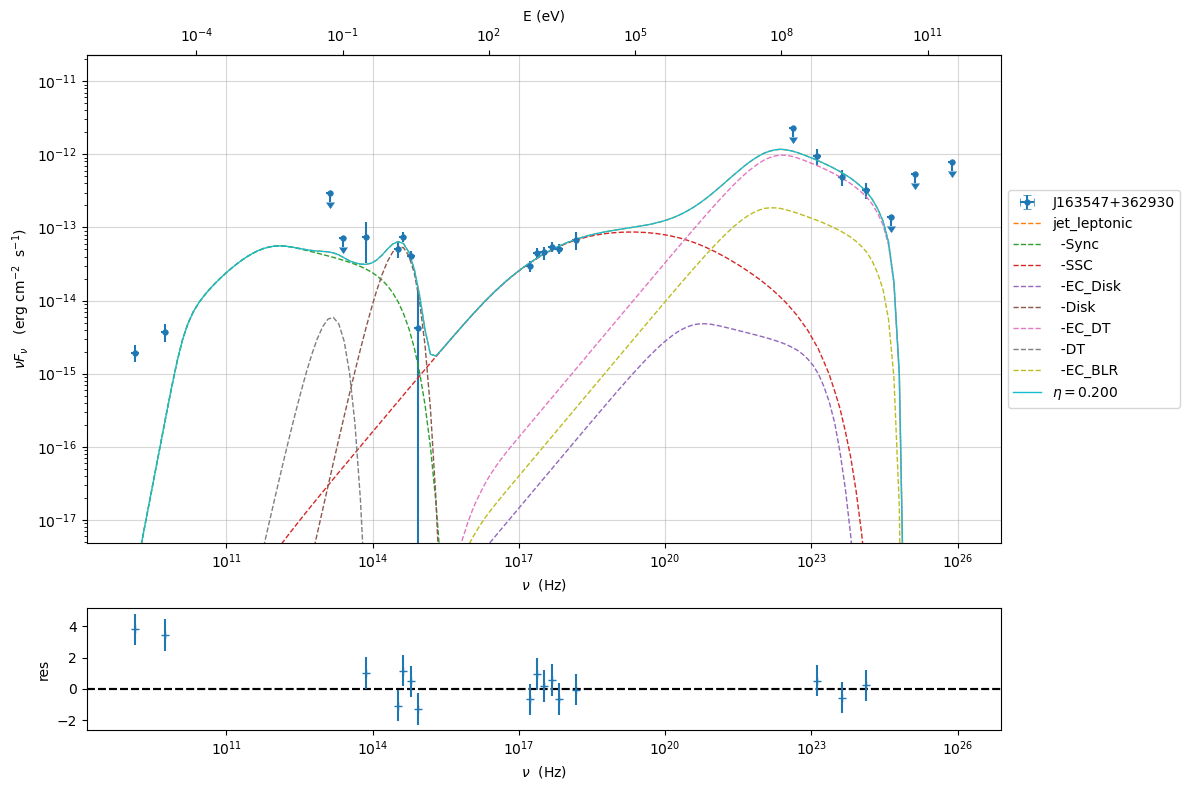

In [81]:
jet_2=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_2.set_par('accr_eff',val=0.200)
jet_2.set_par('L_Disk',val=L_Disk*3.)
jet_2.set_par('R_H',val=R_H*1.55)
jet_2.set_par('B',val=B*0.30)

jet_2.eval()
#jet_2.show_model()

p=jet_2.plot_model(sed_data=sed_data)
plt.show()
#print(js)

fit_model_2=FitModel(jet=jet_2, name=r'$\eta = 0.200$',template=None)

fit_model_2.free('jet_leptonic','R_H')
#fit_model_2.freeze('jet_leptonic','B')
fit_model_2.freeze('jet_leptonic','theta')
fit_model_2.freeze('jet_leptonic','theta_open')
#fit_model_2.freeze('jet_leptonic','BulkFactor')
fit_model_2.freeze('jet_leptonic','z_cosm')
fit_model_2.freeze('jet_leptonic','gmin')
fit_model_2.freeze('jet_leptonic','gmax')
#fit_model_2.freeze('jet_leptonic','N')
#fit_model_2.freeze('jet_leptonic','gamma_break')
#fit_model_2.freeze('jet_leptonic','p')
#fit_model_2.freeze('jet_leptonic','p_1')
fit_model_2.freeze('jet_leptonic','R_inner_Sw')
fit_model_2.freeze('jet_leptonic','R_ext_Sw')
fit_model_2.freeze('jet_leptonic','accr_eff')
#fit_model_2.freeze('jet_leptonic','M_BH')
fit_model_2.freeze('jet_leptonic','T_DT')
#fit_model_2.freeze('jet_leptonic','L_Disk')
fit_model_2.freeze('jet_leptonic','tau_BLR')
fit_model_2.freeze('jet_leptonic','tau_DT')

#fit_model_2.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,2.0e+00]
#fit_model_2.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_2.jet_leptonic.parameters.N.fit_range=[1.00e+02,2.00e+03]
fit_model_2.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_2.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.50e+00]
fit_model_2.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_2.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_2.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_2.jet_leptonic.parameters.M_BH.fit_range=[9.0000e+08,2.000e+9]
#fit_model_2.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_2.jet_leptonic.parameters.L_Disk.fit_range=[8.00e45,8.00e46]
fit_model_2.jet_leptonic.parameters.R_H.fit_range=[1.00e18,3.00e18]
fit_model_2.jet_leptonic.parameters.B.fit_range=[0.020,0.100]
fit_model_2.jet_leptonic.parameters.BulkFactor.fit_range=[15.00,25.00]


fit_model_2.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_2,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.200$',repeat=3, use_UL=True)
fit_model_2.eval()
best_fit_minuit.save_report('Report_best_fit_model_2_1.pkl')
fit_model_2.save_model('fit_model_2_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_2_1.pkl')
#fit_model_2.show_model()
#fit_model_2.jet_leptonic.energetic_report()
p2=fit_model_2.plot_model(sed_data=sed_data)
#p2.save('fit_model_2.png')
print(fit_model_2.jet_leptonic.get_beaming())

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


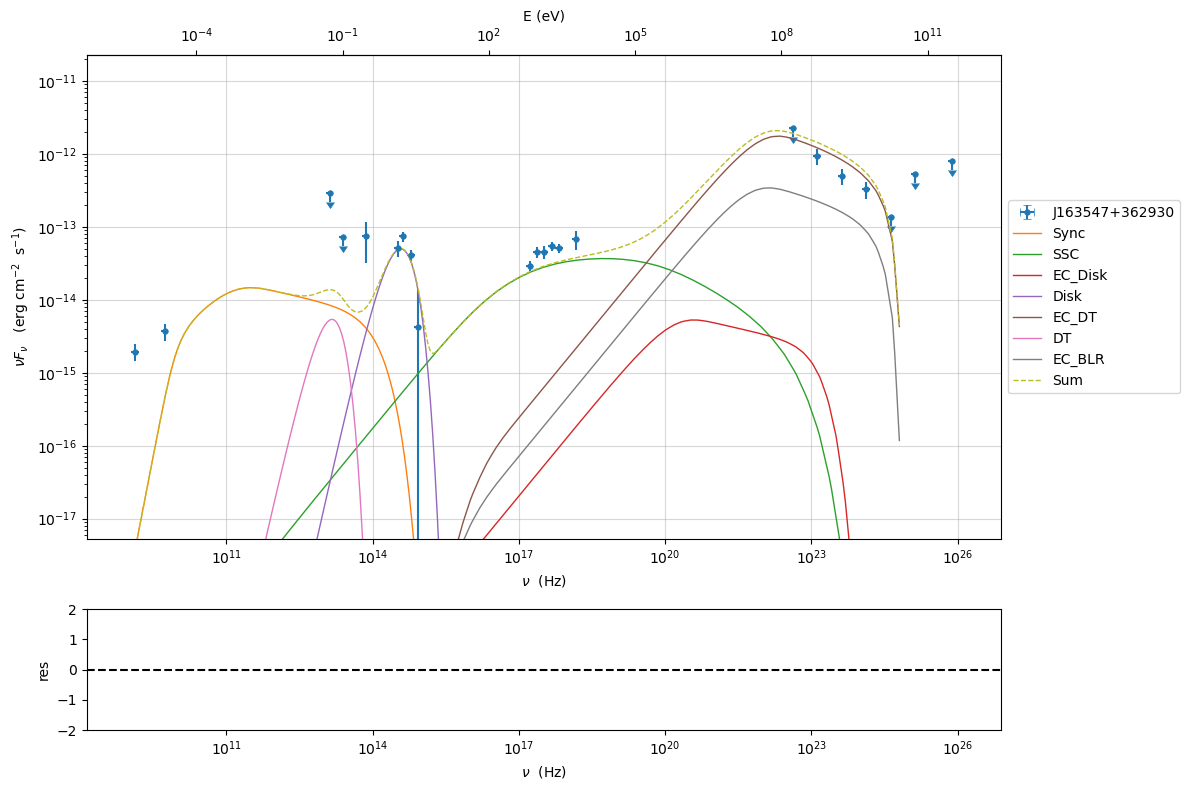

filtering data in fit range = [1.000000e+08,1.000000e+30]
data length 22

*** start fit process ***
----- 
fit run: 0


0it [00:00, ?it/s]

- best chisq=3.40696e+01

fit run: 1
- old chisq=3.40696e+01


0it [00:00, ?it/s]

- best chisq=3.40345e+01

fit run: 2
- old chisq=3.40345e+01


0it [00:00, ?it/s]

- best chisq=3.39873e+01

-------------------------------------------------------------------------
Fit report

Model: $\eta = 0.300$



converged=True
calls=1375
mesg=


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 33.99                      │             Nfcn = 1375              │
│ EDM = 1.81e+03 (Goal: 0.0002)    │           time = 427.1 sec           │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ ABOVE EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │APPROXIMATE│  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ par_0 │   0.3e3   │   1.0e3   │            │            │   100   │  2000   │       │
│ 1 │ par_1 │  0.98e3   │  0.35e3   │            │            │   500   │  1000   │       │
│ 2 │ par_2 │   1.39    │   0.14    │            │            │   1.3   │   1.5   │       │
│ 3 │ par_3 │   3.31    │   0.32    │            │            │   3.3   │   3.8   │       │
│ 4 │ par_4 │   1.0e9   │   0.4e9   │            │            │  8e+08  │ 1.5e+09 │       │
│ 5 │ par_5 │  0.06e48  │  0.05e48  │            │            │  8e+45  │  8e+46  │       │
│ 6 │ par_6 │  2.7e18   │  2.2e18   │            │            │  1e+18  │  4e+18  │       │
│ 7 │ par_7 │   0.04    │   0.06    │            │            │  0.01   │   0.1   │       │
│ 8 │ par_8 │    21     │     7     │            │            │   15    │   25    │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────────────────────────────────────────────────────────────────────────────┐
│       │     par_0     par_1     par_2     par_3     par_4     par_5     par_6     par_7     par_8 │
├───────┼───────────────────────────────────────────────────────────────────────────────────────────┤
│ par_0 │  3.54e+05      -112    0.0284    0.0733 -3.82e+07 -3.74e+41  8.14e+14   -0.0056      2.37 │
│ par_1 │      -112  9.25e+03     0.083     0.475  1.15e+08 -3.66e+42  3.56e+15   -0.0168       1.3 │
│ par_2 │    0.0284     0.083   0.00999 -6.21e-05  2.35e+04  2.28e+38 -2.01e+11  3.96e-06  -0.00135 │
│ par_3 │    0.0733     0.475 -6.21e-05   0.00811 -1.34e+06  1.01e+40 -3.07e+12  1.47e-05    0.0196 │
│ par_4 │ -3.82e+07  1.15e+08  2.35e+04 -1.34e+06   1.2e+17 -9.31e+48  3.96e+21  1.24e+04  2.31e+07 │
│ par_5 │ -3.74e+41 -3.66e+42  2.28e+38  1.01e+40 -9.31e+48   1.1e+93  -9.3e+55  1.07e+38  -5.3e+41 │
│ par_6 │  8.14e+14  3.56e+15 -2.01e+11 -3.07e+12  3.96e+21  -9.3e+55   2.2e+36 -6.59e+09  1.57e+14 │
│ par_7 │   -0.0056   -0.0168  3.96e-06  1.47e-05  1.24e+04  1.07e+38 -6.59e+09   0.00177  0.000586 │
│ par_8 │      2.37       1.3  -0.00135    0.0196  2.31e+07  -5.3e+41  1.57e+14  0.000586      27.7 │
└───────┴───────────────────────────────────────────────────────────────────────────────────────────┘

dof=13
chisq=33.987273, chisq/red=2.614406 null hypothesis sig=0.001209

stats without the UL
dof  UL=7
chisq=33.750665, chisq/red=4.821524 null hypothesis sig=0.000019


best fit pars


-------------------------------------------------------------------------


19.025133487180508


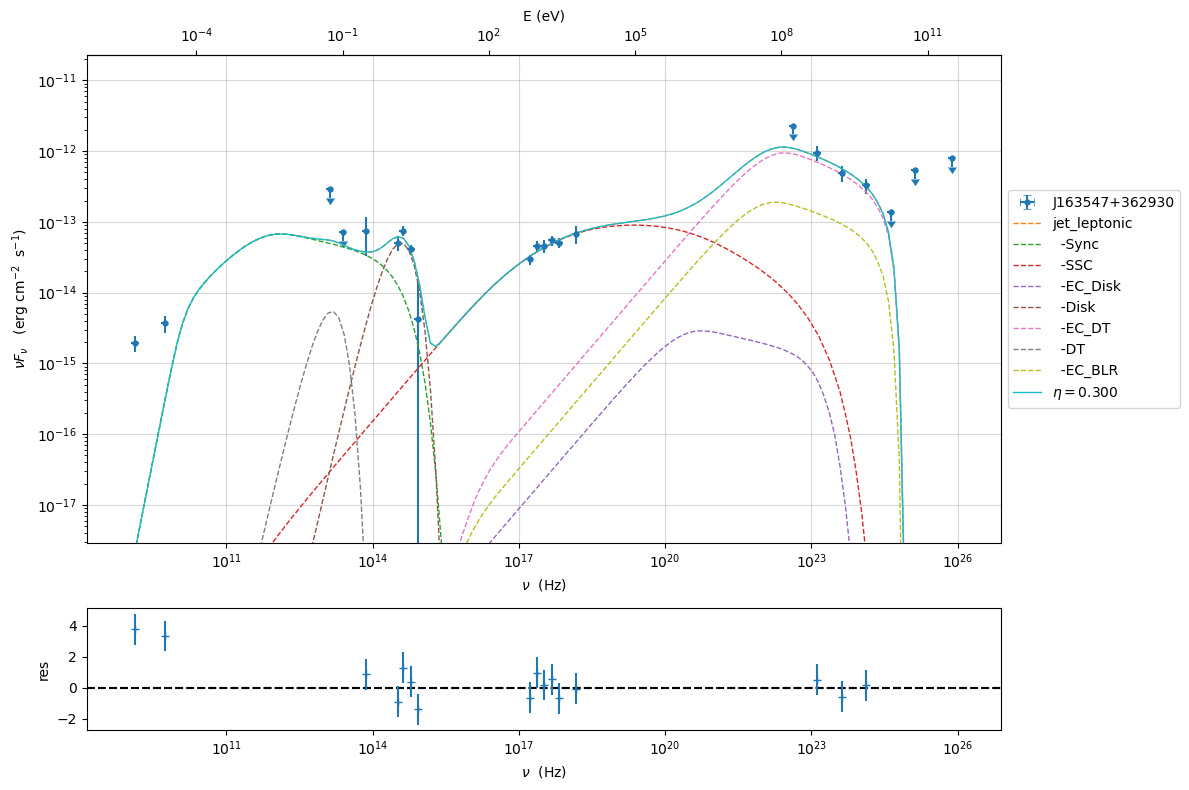

In [7]:
jet_3=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")

jet_3.set_par('accr_eff',val=0.300)
jet_3.set_par('L_Disk',val=L_Disk*4.1)
jet_3.set_par('R_H',val=R_H*1.8)
jet_3.set_par('B',val=B*0.20)

jet_3.eval()
#jet_3.show_model()

p=jet_3.plot_model(sed_data=sed_data)
plt.show()

fit_model_3=FitModel(jet=jet_3, name=r'$\eta = 0.300$',template=None)

fit_model_3.free('jet_leptonic','R_H')
#fit_model_3.freeze('jet_leptonic','B')
fit_model_3.freeze('jet_leptonic','theta')
fit_model_3.freeze('jet_leptonic','theta_open')
#fit_model_3.freeze('jet_leptonic','BulkFactor')
fit_model_3.freeze('jet_leptonic','z_cosm')
fit_model_3.freeze('jet_leptonic','gmin')
fit_model_3.freeze('jet_leptonic','gmax')
#fit_model_3.freeze('jet_leptonic','N')
#fit_model_3.freeze('jet_leptonic','gamma_break')
#fit_model_3.freeze('jet_leptonic','p')
#fit_model_3.freeze('jet_leptonic','p_1')
fit_model_3.freeze('jet_leptonic','R_inner_Sw')
fit_model_3.freeze('jet_leptonic','R_ext_Sw')
fit_model_3.freeze('jet_leptonic','accr_eff')
#fit_model_3.freeze('jet_leptonic','M_BH')
fit_model_3.freeze('jet_leptonic','T_DT')
#fit_model_3.freeze('jet_leptonic','L_Disk')
fit_model_3.freeze('jet_leptonic','tau_BLR')
fit_model_3.freeze('jet_leptonic','tau_DT')

#fit_model_3.jet_leptonic.parameters.gmin.fit_range=[1.00e+00,2.0e+00]
#fit_model_3.jet_leptonic.parameters.gmax.fit_range=[1.00e+04,4.0e+04]
fit_model_3.jet_leptonic.parameters.N.fit_range=[1.00e+02,2.00e+03]
fit_model_3.jet_leptonic.parameters.gamma_break.fit_range=[5.00e+02,1.00e+03]
fit_model_3.jet_leptonic.parameters.p.fit_range=[1.30e+00,1.50e+00]
fit_model_3.jet_leptonic.parameters.p_1.fit_range=[3.30e+00,3.80e+00]
#fit_model_3.jet_leptonic.parameters.R_inner_Sw.fit_range=[5.0e+00,1.5e+01]
#fit_model_3.jet_leptonic.parameters.R_ext_Sw.fit_range=[1.000e+02,3.00e+02]
fit_model_3.jet_leptonic.parameters.M_BH.fit_range=[8.0000e+08,1.500e+9]
#fit_model_3.jet_leptonic.parameters.T_DT.fit_range=[4.00000e+02,8.000e+02]
fit_model_3.jet_leptonic.parameters.L_Disk.fit_range=[8.00e45,8.00e46]
fit_model_3.jet_leptonic.parameters.R_H.fit_range=[1.00e18,4.00e18]
fit_model_3.jet_leptonic.parameters.B.fit_range=[0.010,0.100]
fit_model_3.jet_leptonic.parameters.BulkFactor.fit_range=[15.00,25.00]


fit_model_3.eval()

model_minimizer_minuit=ModelMinimizer('minuit')
best_fit_minuit=model_minimizer_minuit.fit(fit_model_3,sed_data,10**8.,10**30.0,
                                           fitname=r'$\eta = 0.300$',repeat=3, use_UL=True)
fit_model_3.eval()
best_fit_minuit.save_report('Report_best_fit_model_3_1.pkl')
fit_model_3.save_model('fit_model_3_1.pkl')
model_minimizer_minuit.save_model('model_minimizer_3_1.pkl')
#fit_model_3.show_model()
#fit_model_3.jet_leptonic.energetic_report()
p2=fit_model_3.plot_model(sed_data=sed_data)
#p2.save('fit_model_3.png')
print(fit_model_3.jet_leptonic.get_beaming())

# MCMC
## $\eta=0.057$

mcmc run starting



  0%|          | 0/20 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 747.30 seconds


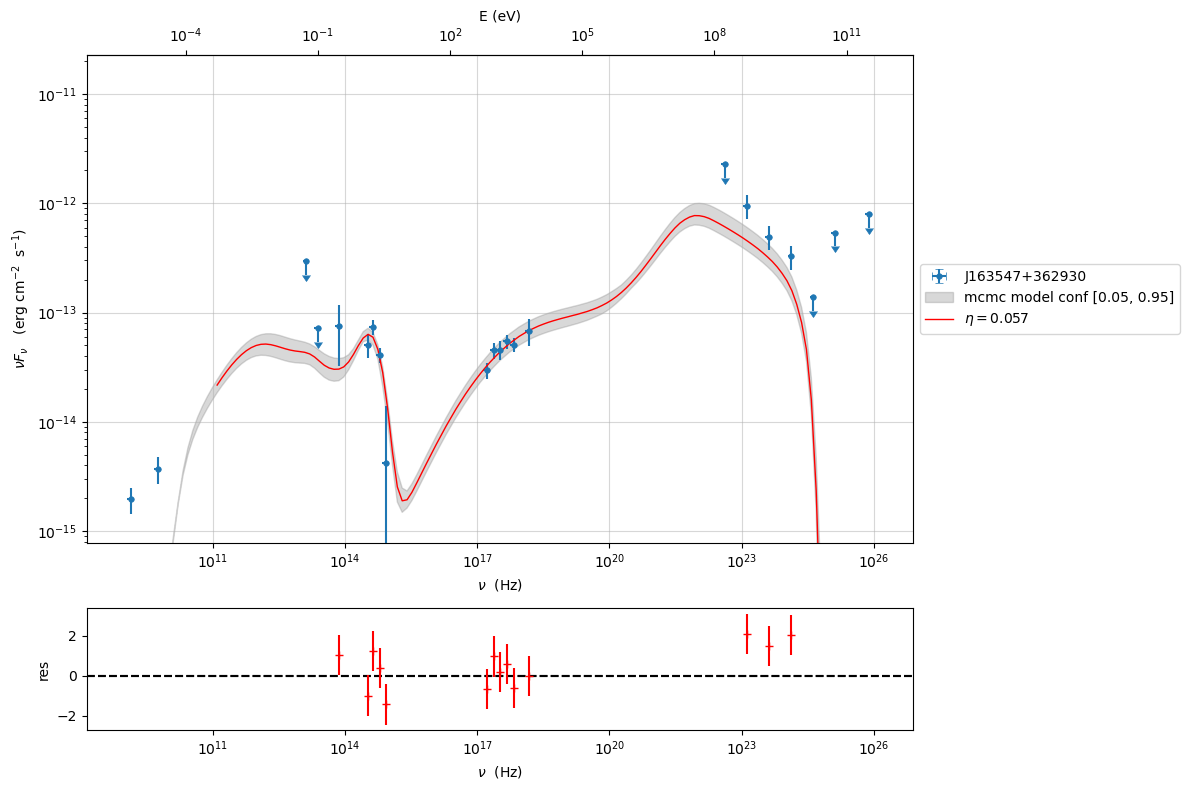

In [84]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_5_1.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['N','M_BH','R_H','B','L_Disk','BulkFactor']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=20,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=20, quantiles=[0.05,0.95])

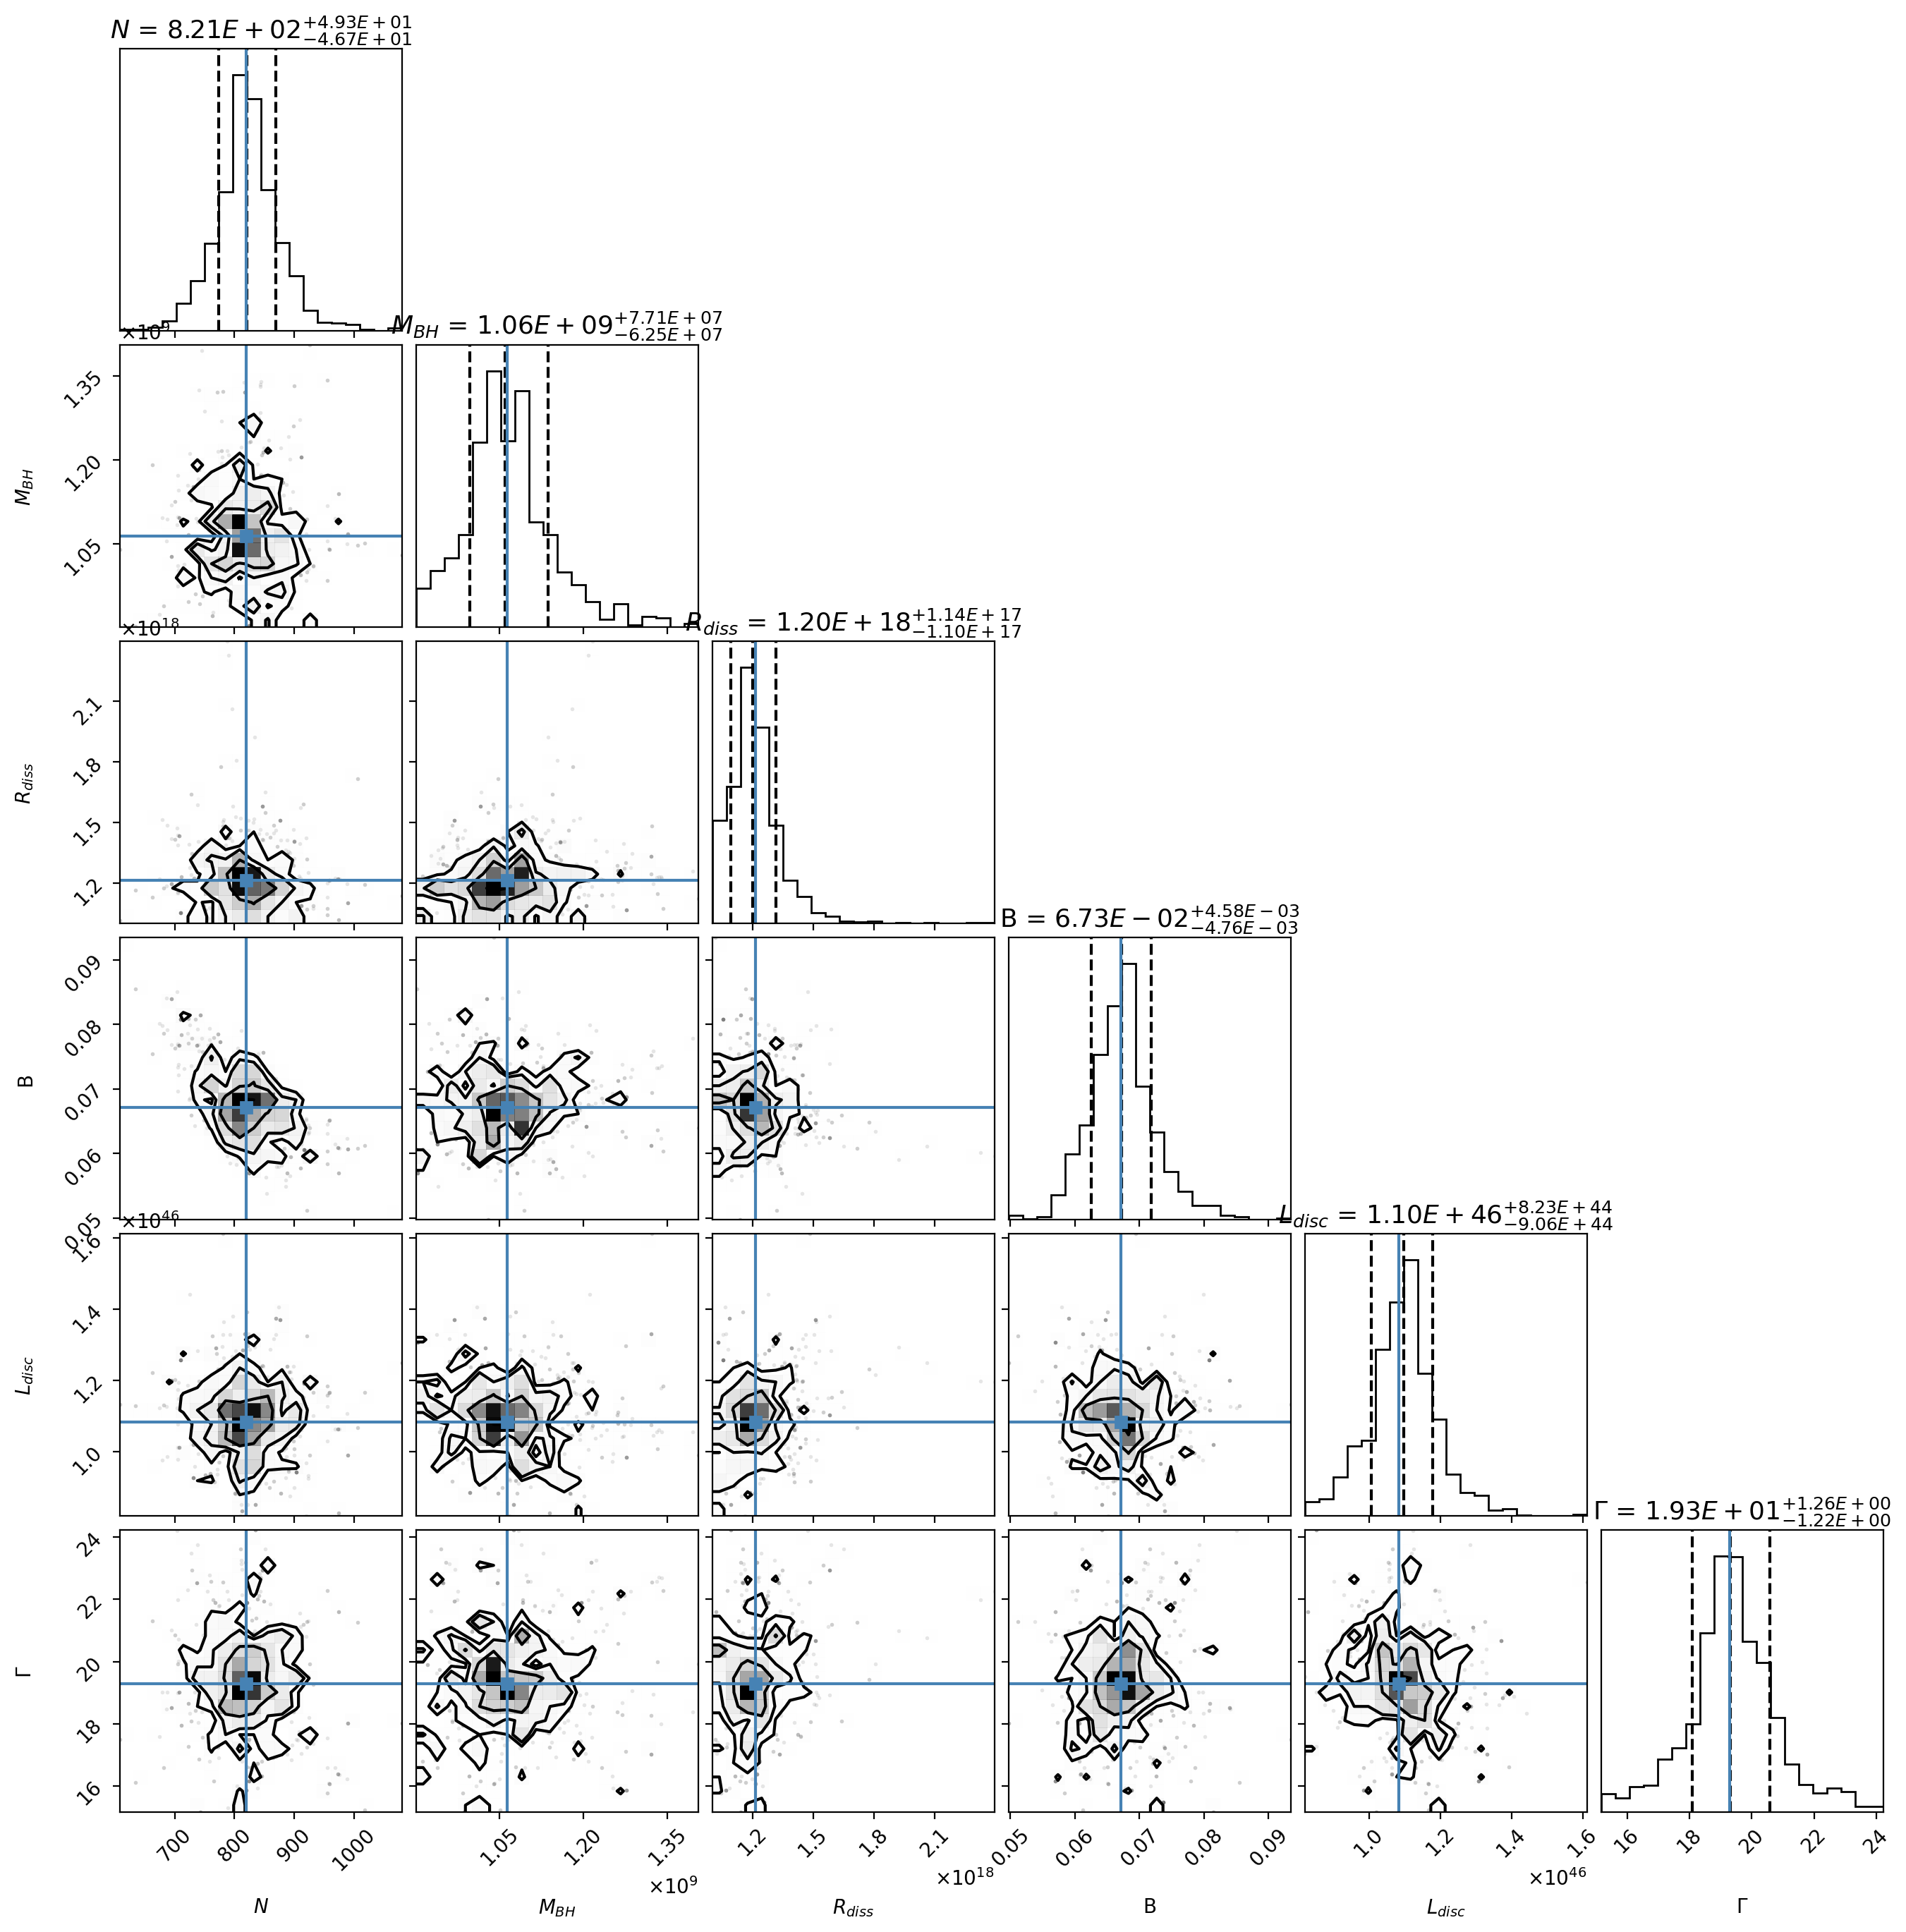

In [85]:
labes=[r'$N$',r'$M_{BH}$',r'$R_{diss}$','B',r'$L_{disc}$',r'$\Gamma$']
plt.rcParams['figure.dpi'] = 200
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_5_1.pkl')

# $\eta=0.083$

mcmc run starting



  0%|          | 0/20 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 747.67 seconds


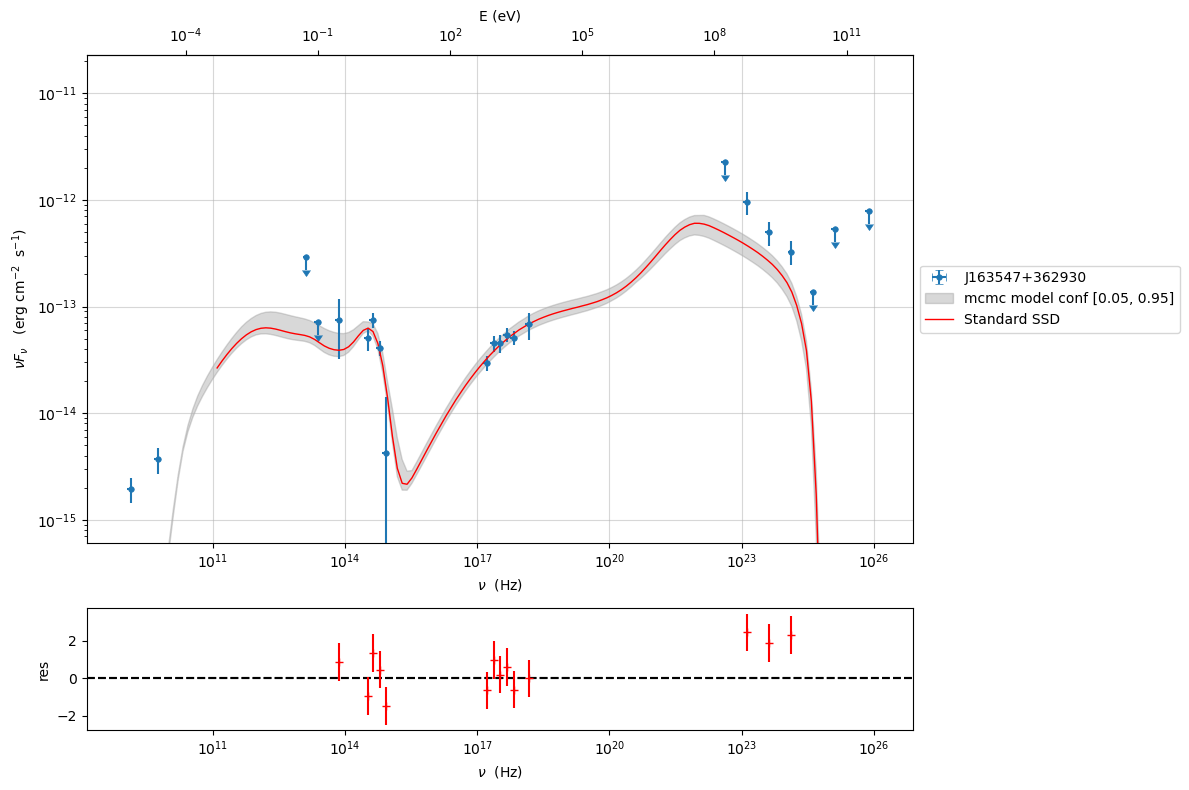

In [86]:
model_minimizer_minuit = ModelMinimizer.load_model('/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/PrePrefit_A/model_minimizer_PrePre.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['N','M_BH','R_H','B','L_Disk','BulkFactor']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=20,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=20, quantiles=[0.05,0.95])

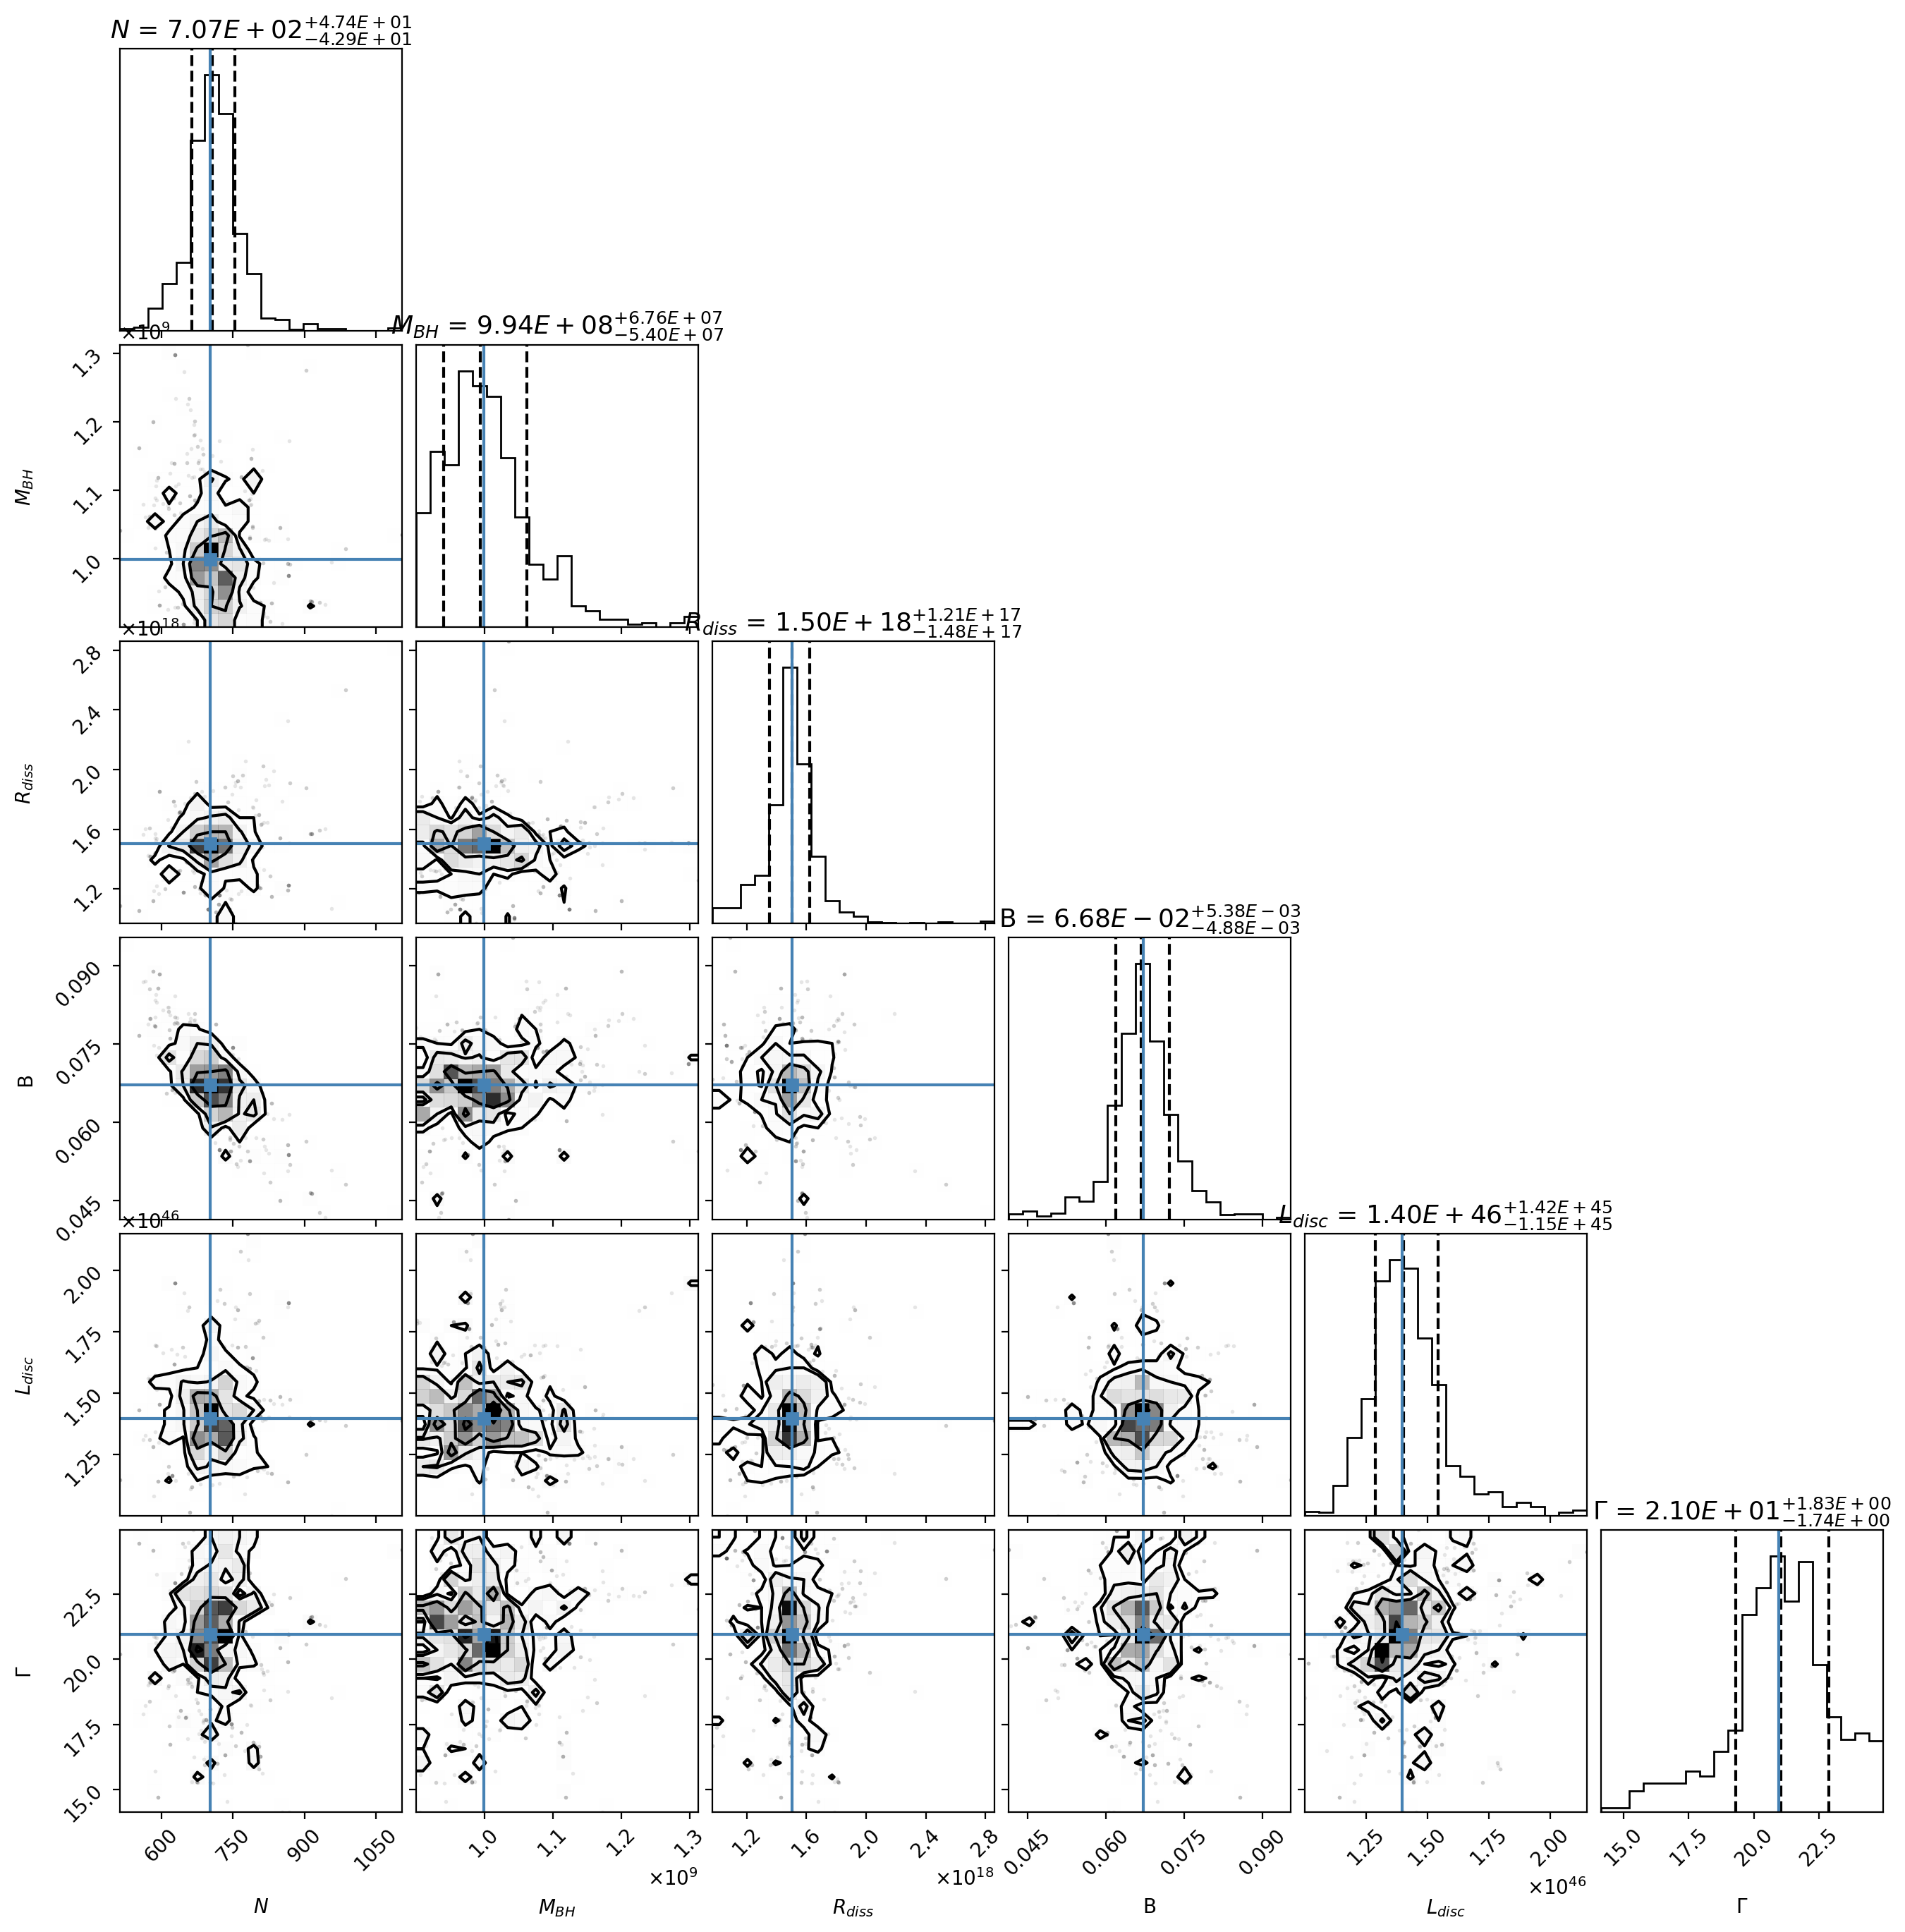

In [87]:
labes=[r'$N$',r'$M_{BH}$',r'$R_{diss}$','B',r'$L_{disc}$',r'$\Gamma$']
plt.rcParams['figure.dpi'] = 200
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_8_1.pkl')

# $\eta=0.100$

mcmc run starting



  0%|          | 0/20 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 736.78 seconds


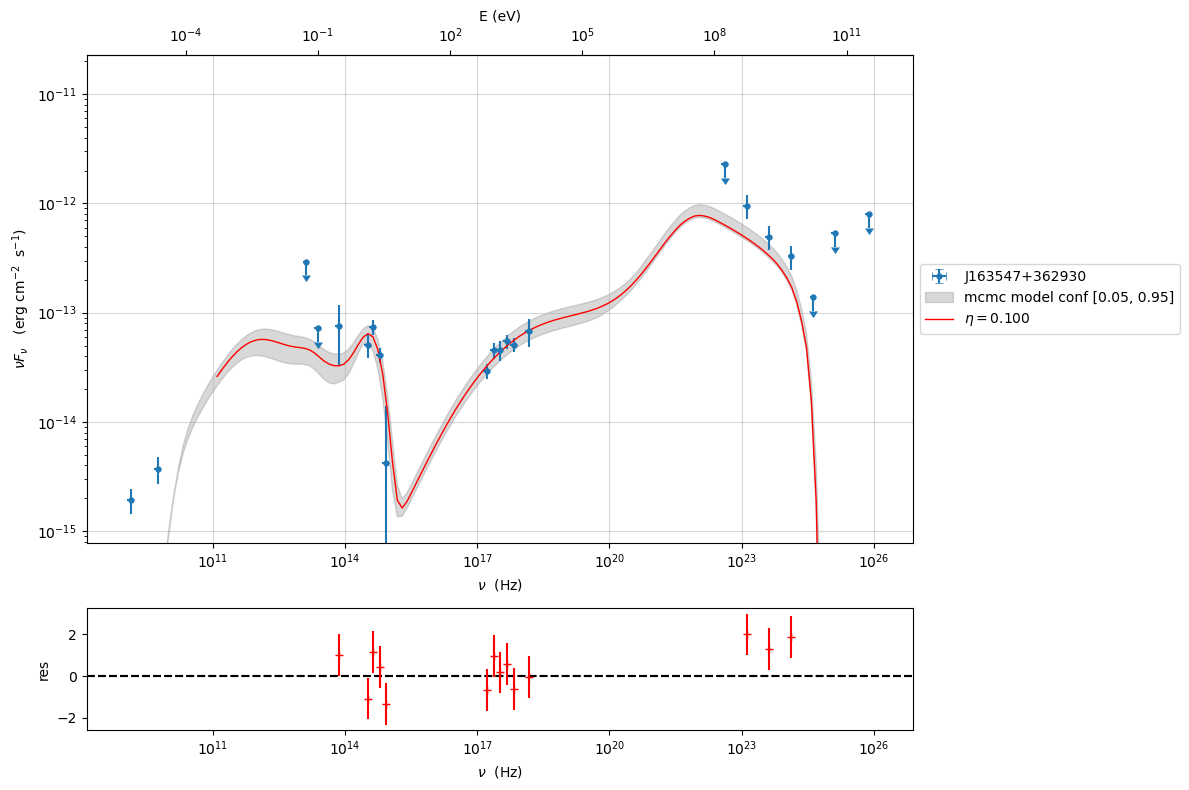

In [88]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_1_1.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['N','M_BH','R_H','B','L_Disk','BulkFactor']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=20,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=20, quantiles=[0.05,0.95])

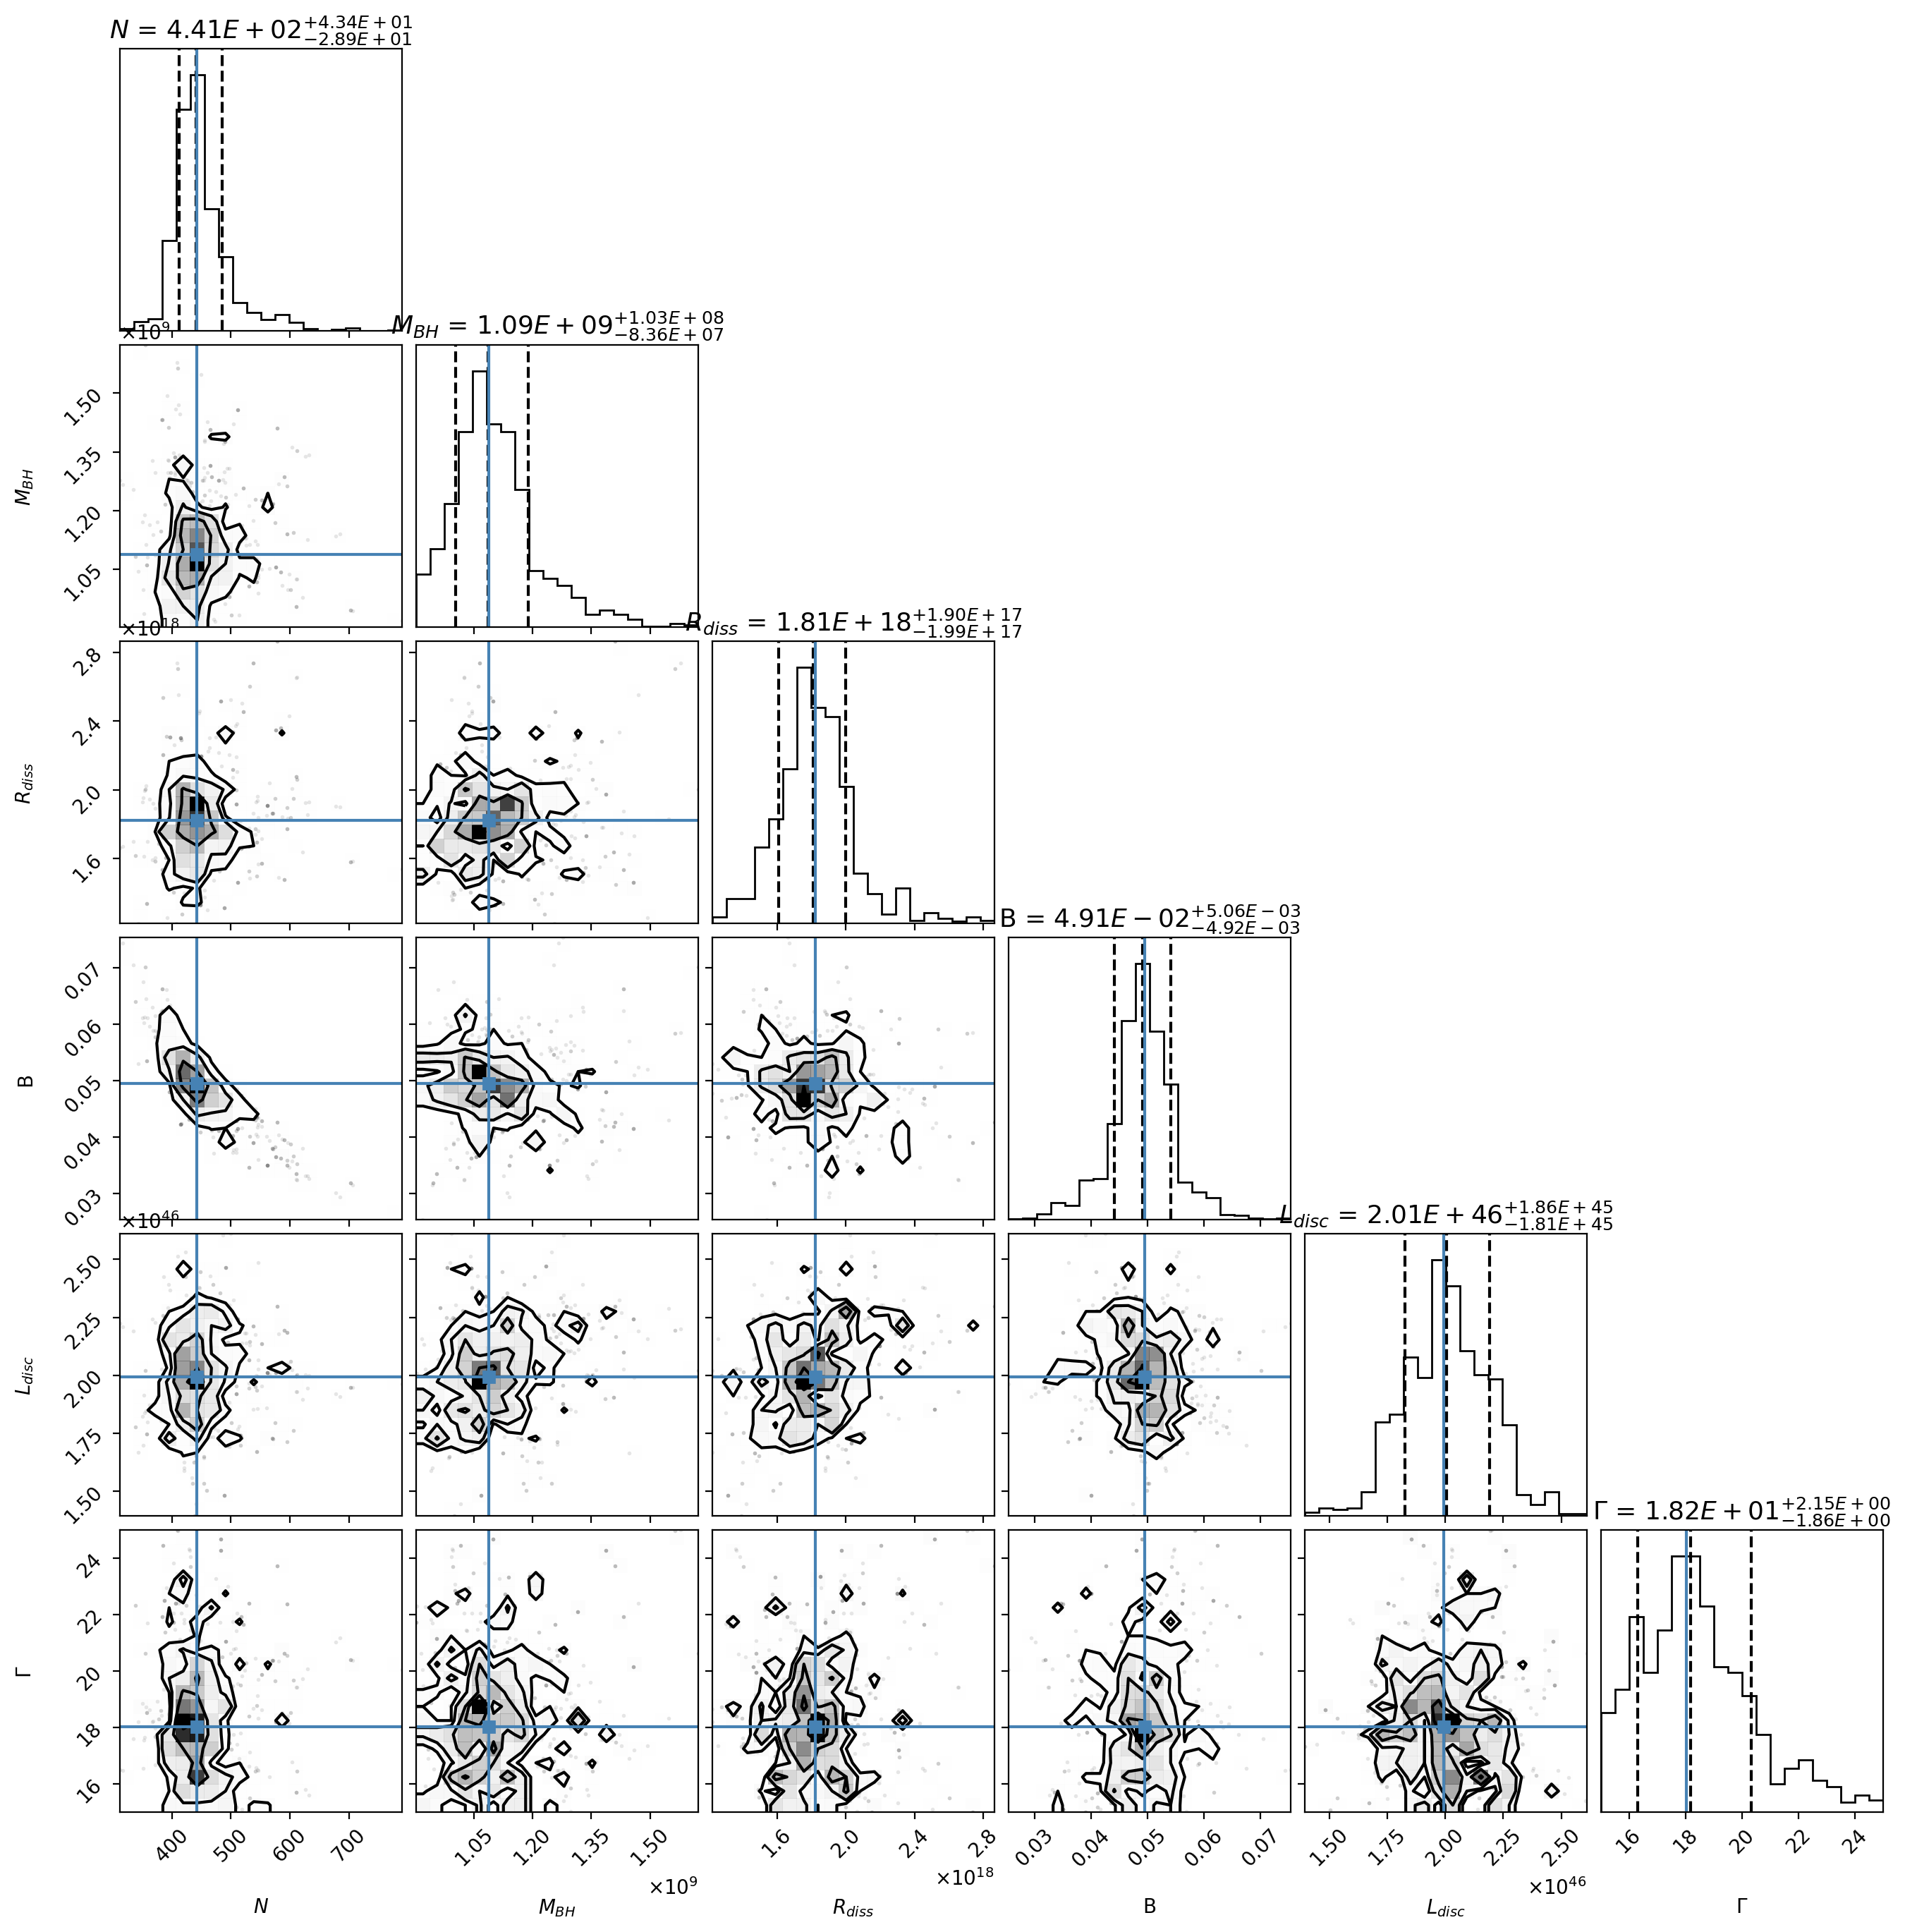

In [89]:
labes=[r'$N$',r'$M_{BH}$',r'$R_{diss}$','B',r'$L_{disc}$',r'$\Gamma$']
plt.rcParams['figure.dpi'] = 200
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_1_1.pkl')

# $\eta=0.150$

mcmc run starting



  0%|          | 0/20 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 766.08 seconds


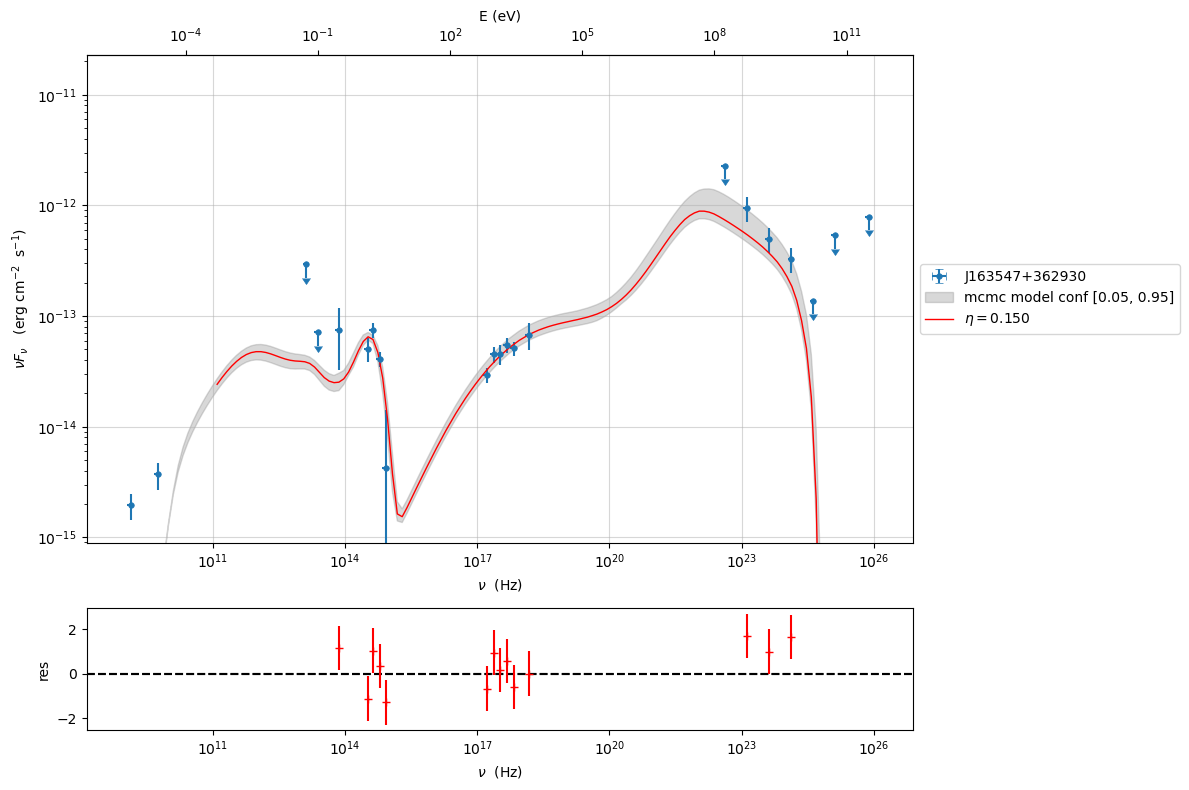

In [97]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_1_5_1.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['N','M_BH','R_H','B','L_Disk','BulkFactor']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=20,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=20, quantiles=[0.05,0.95])

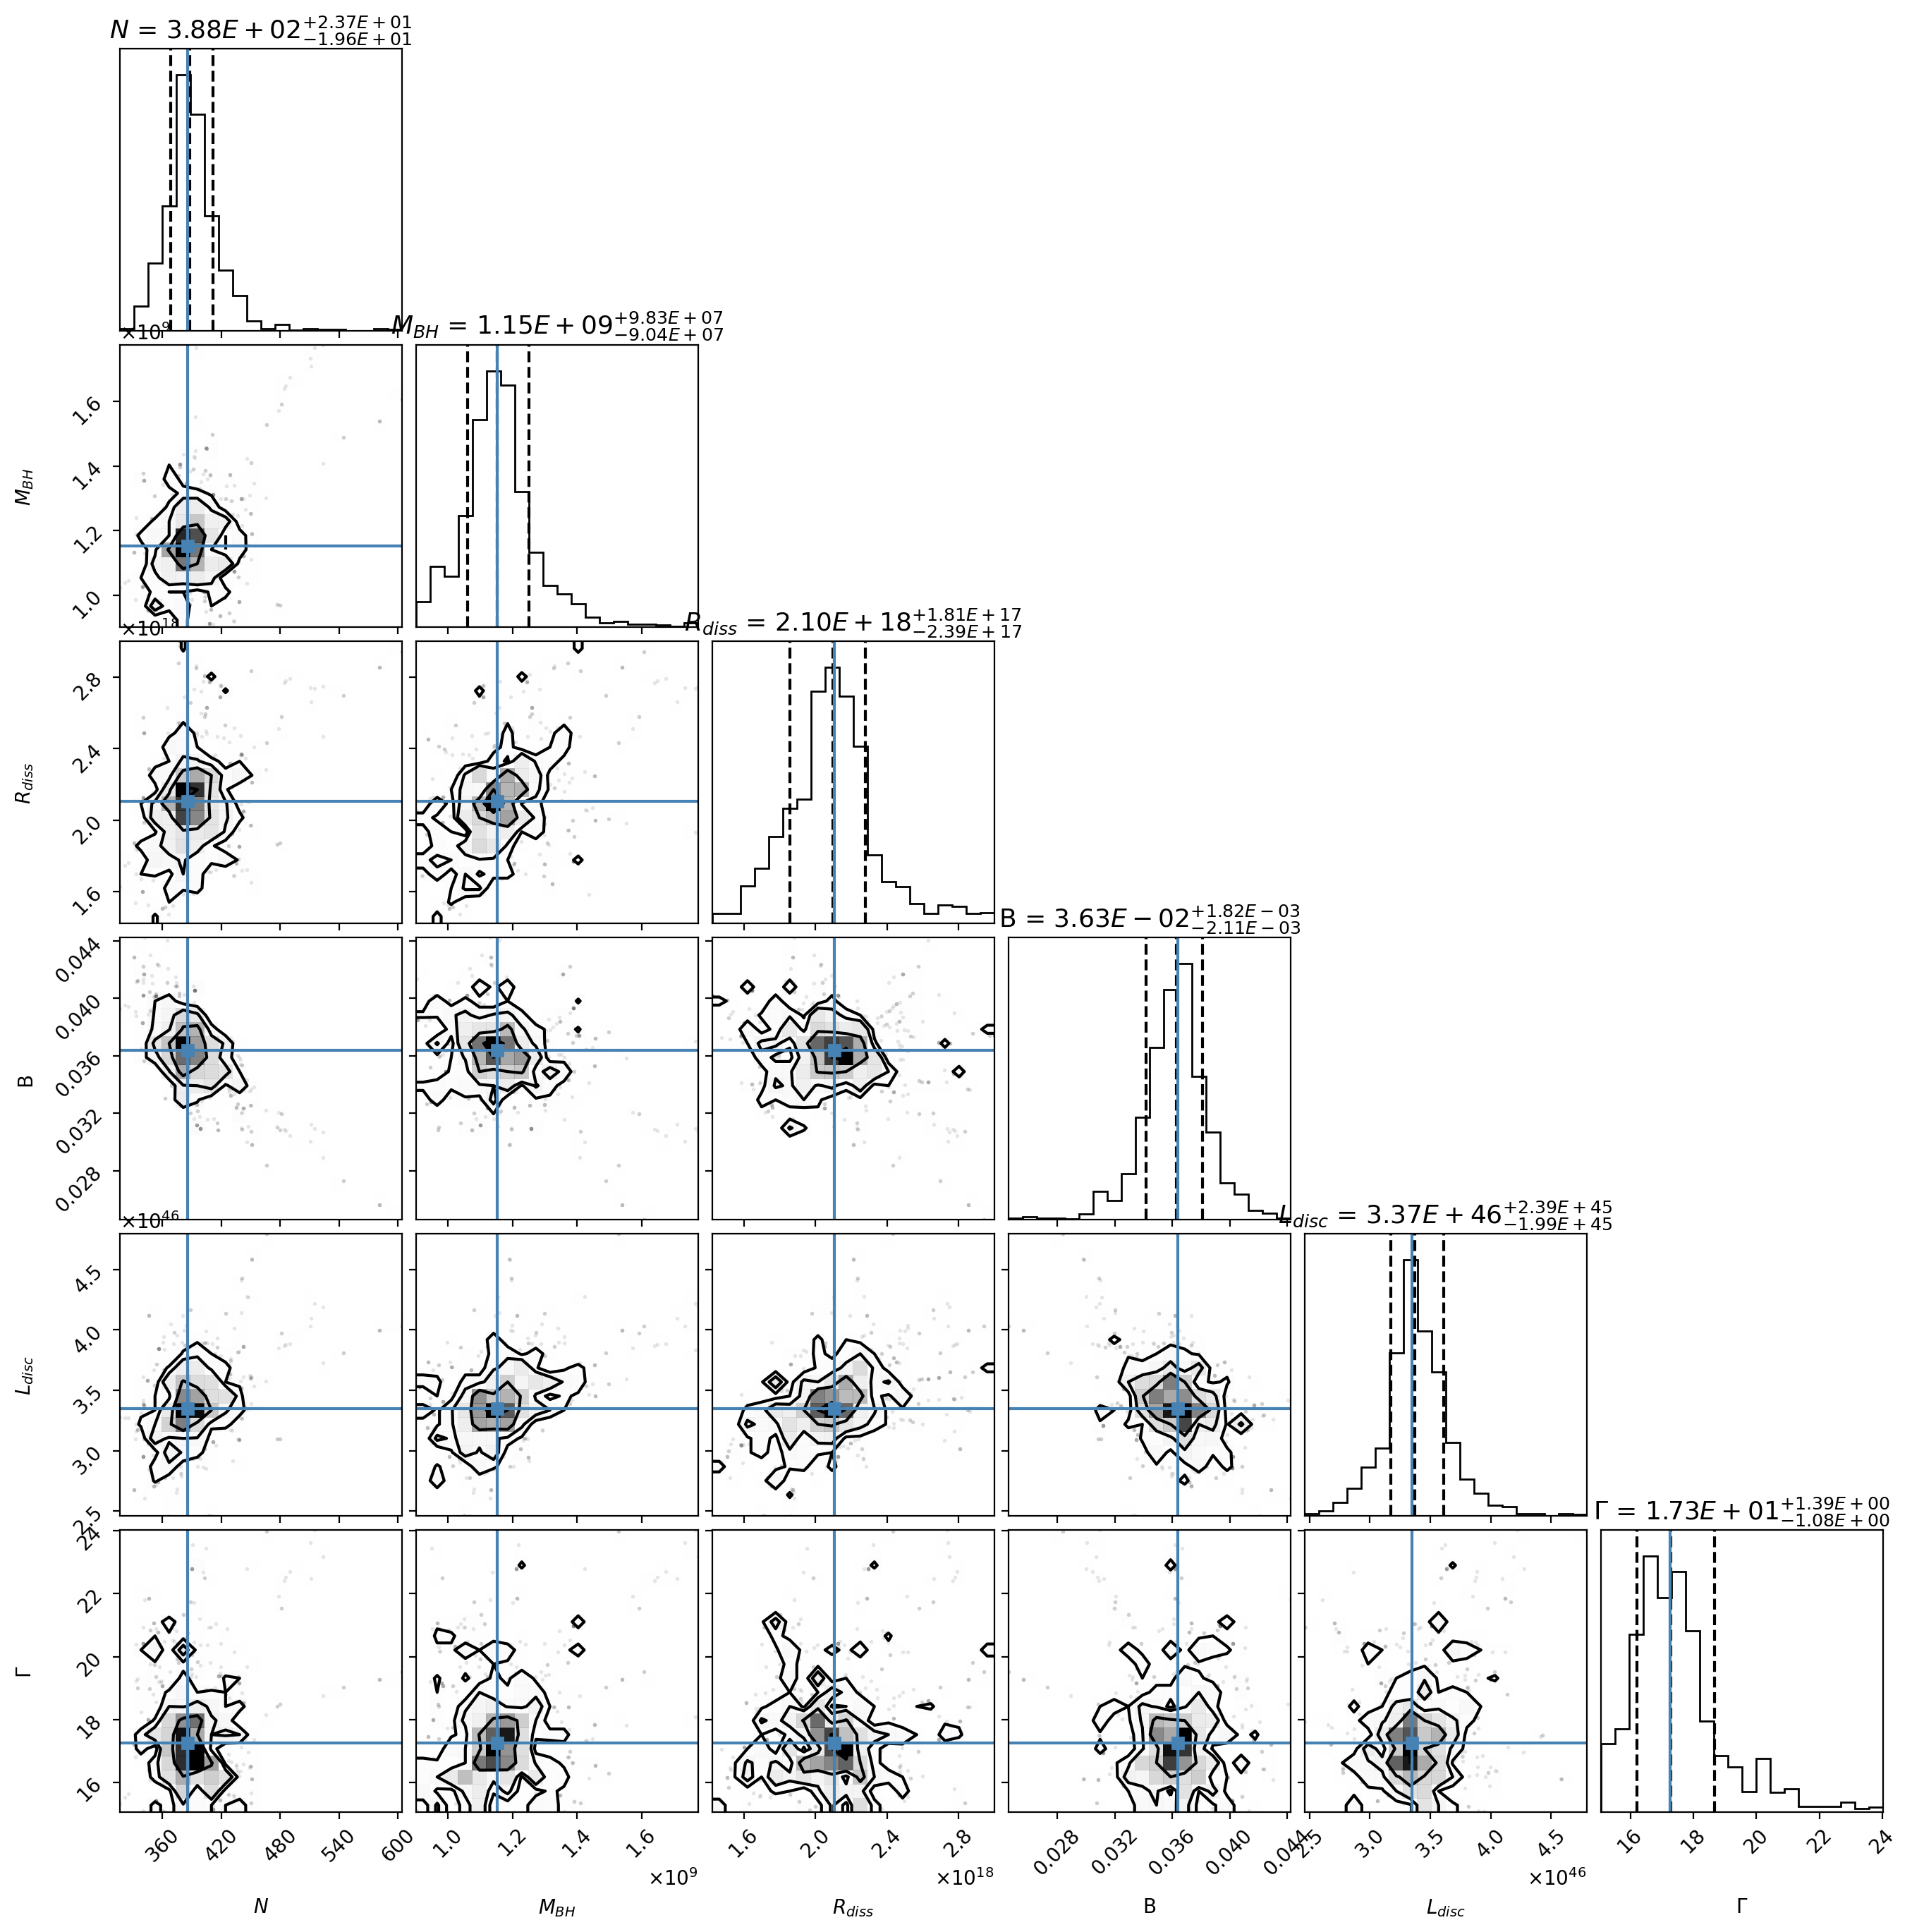

In [98]:
labes=[r'$N$',r'$M_{BH}$',r'$R_{diss}$','B',r'$L_{disc}$',r'$\Gamma$']
plt.rcParams['figure.dpi'] = 200
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_1_5_1.pkl')

# $\eta=0.200$

mcmc run starting



  0%|          | 0/20 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 750.38 seconds


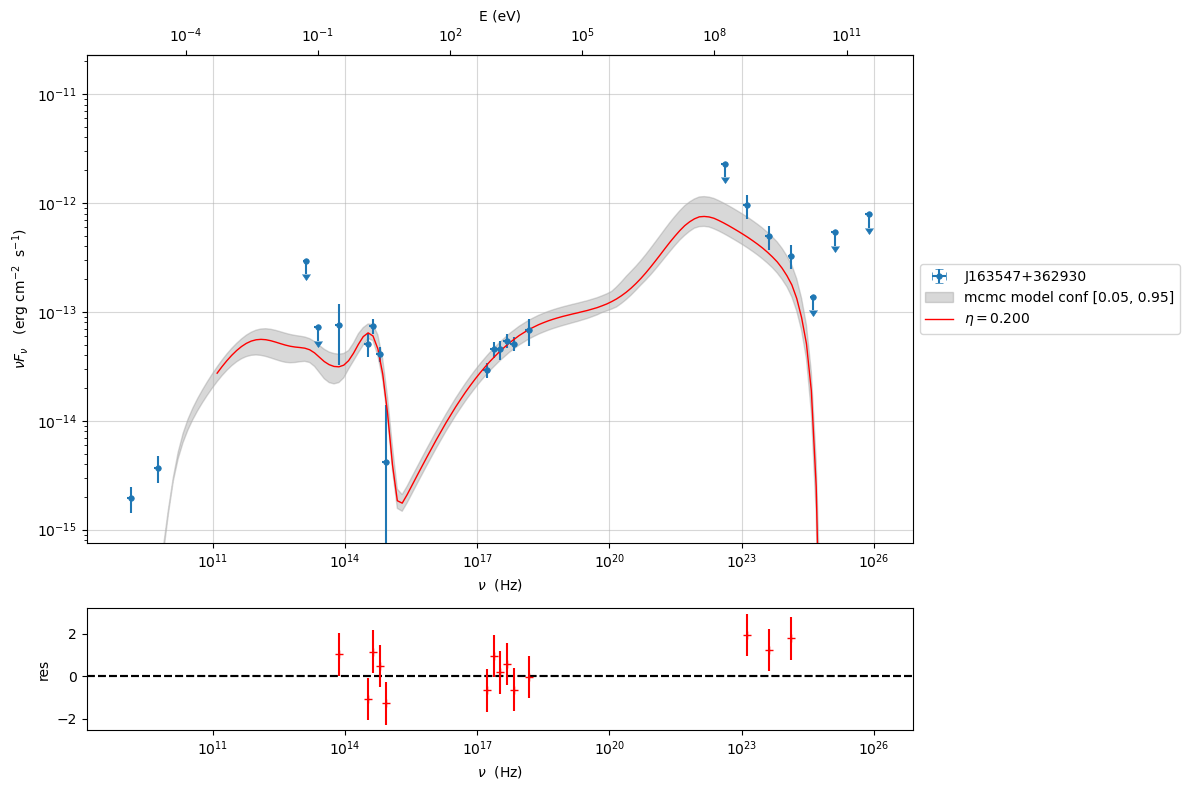

In [99]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_2_1.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['N','M_BH','R_H','B','L_Disk','BulkFactor']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=20,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=20, quantiles=[0.05,0.95])

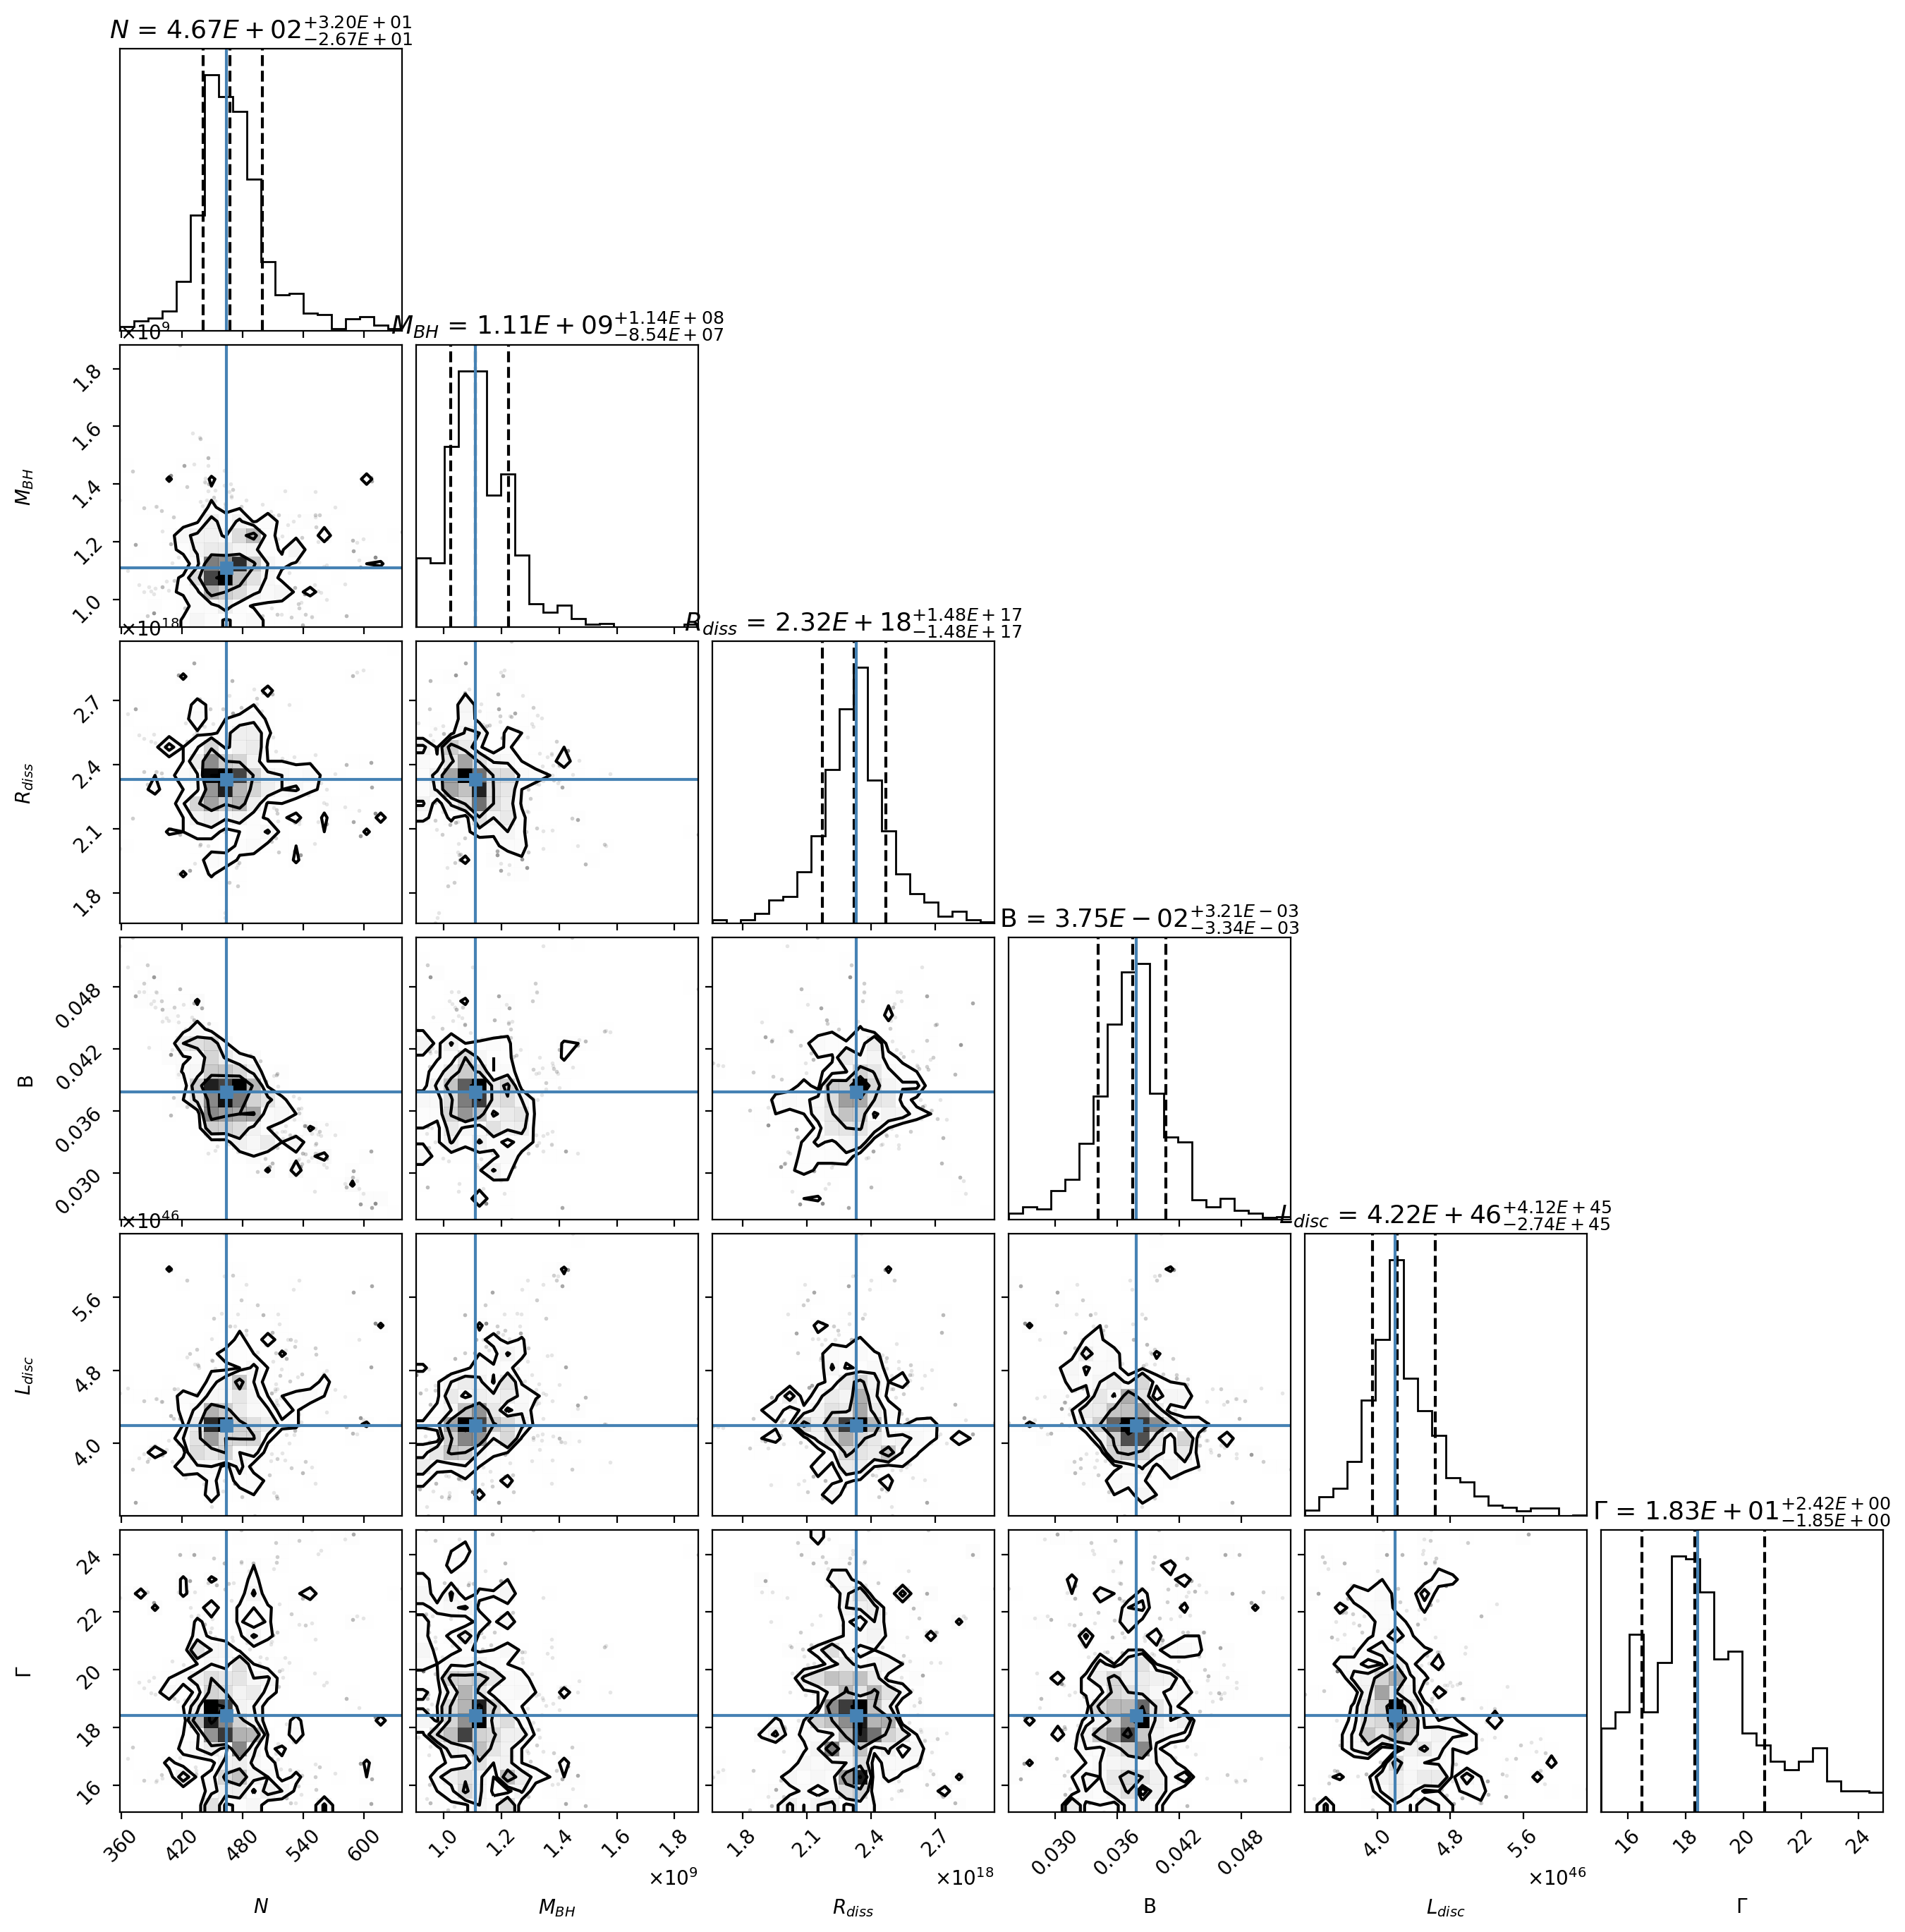

In [100]:
labes=[r'$N$',r'$M_{BH}$',r'$R_{diss}$','B',r'$L_{disc}$',r'$\Gamma$']
plt.rcParams['figure.dpi'] = 200
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_2_1.pkl')

# $\eta=0.300$

mcmc run starting



  0%|          | 0/20 [00:00<?, ?it/s]

mcmc run done, with 1 threads took 782.74 seconds


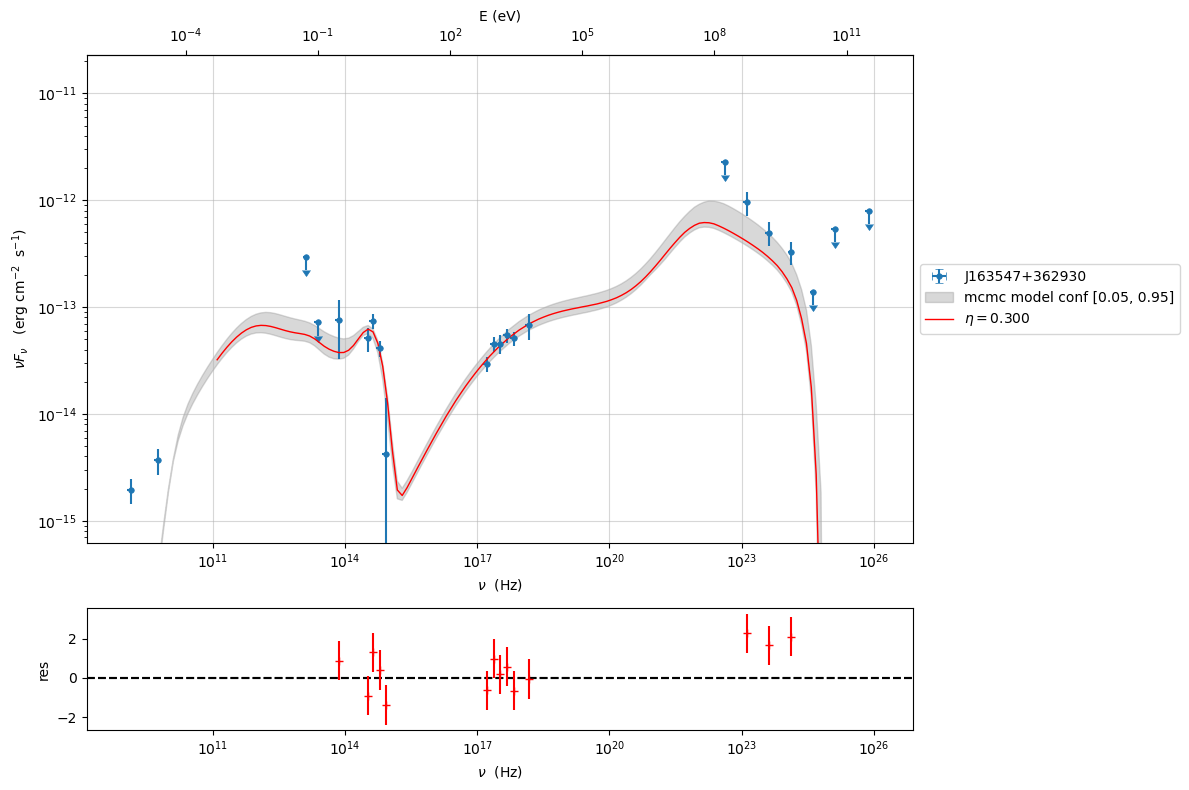

In [10]:
model_minimizer_minuit = ModelMinimizer.load_model('model_minimizer_3_1.pkl')

mcmc=McmcSampler(model_minimizer_minuit)
mcmc.model.jet_leptonic._blob.N_THREADS=8
mcmc.model.jet_leptonic.set_external_field_transf('disk')
labels=['N','M_BH','R_H','B','L_Disk']
model_name='jet_leptonic'
use_labels_dict={model_name:labels}

mcmc.run_sampler(nwalkers=128,burnin=10,steps=20,
                 bound=5.0,bound_rel=True,threads=None,
                 walker_start_bound=0.005,use_labels_dict=use_labels_dict,
                 progress='notebook')
p=mcmc.plot_model(sed_data=sed_data,fit_range=[1E11,2E28],size=20, quantiles=[0.05,0.95])

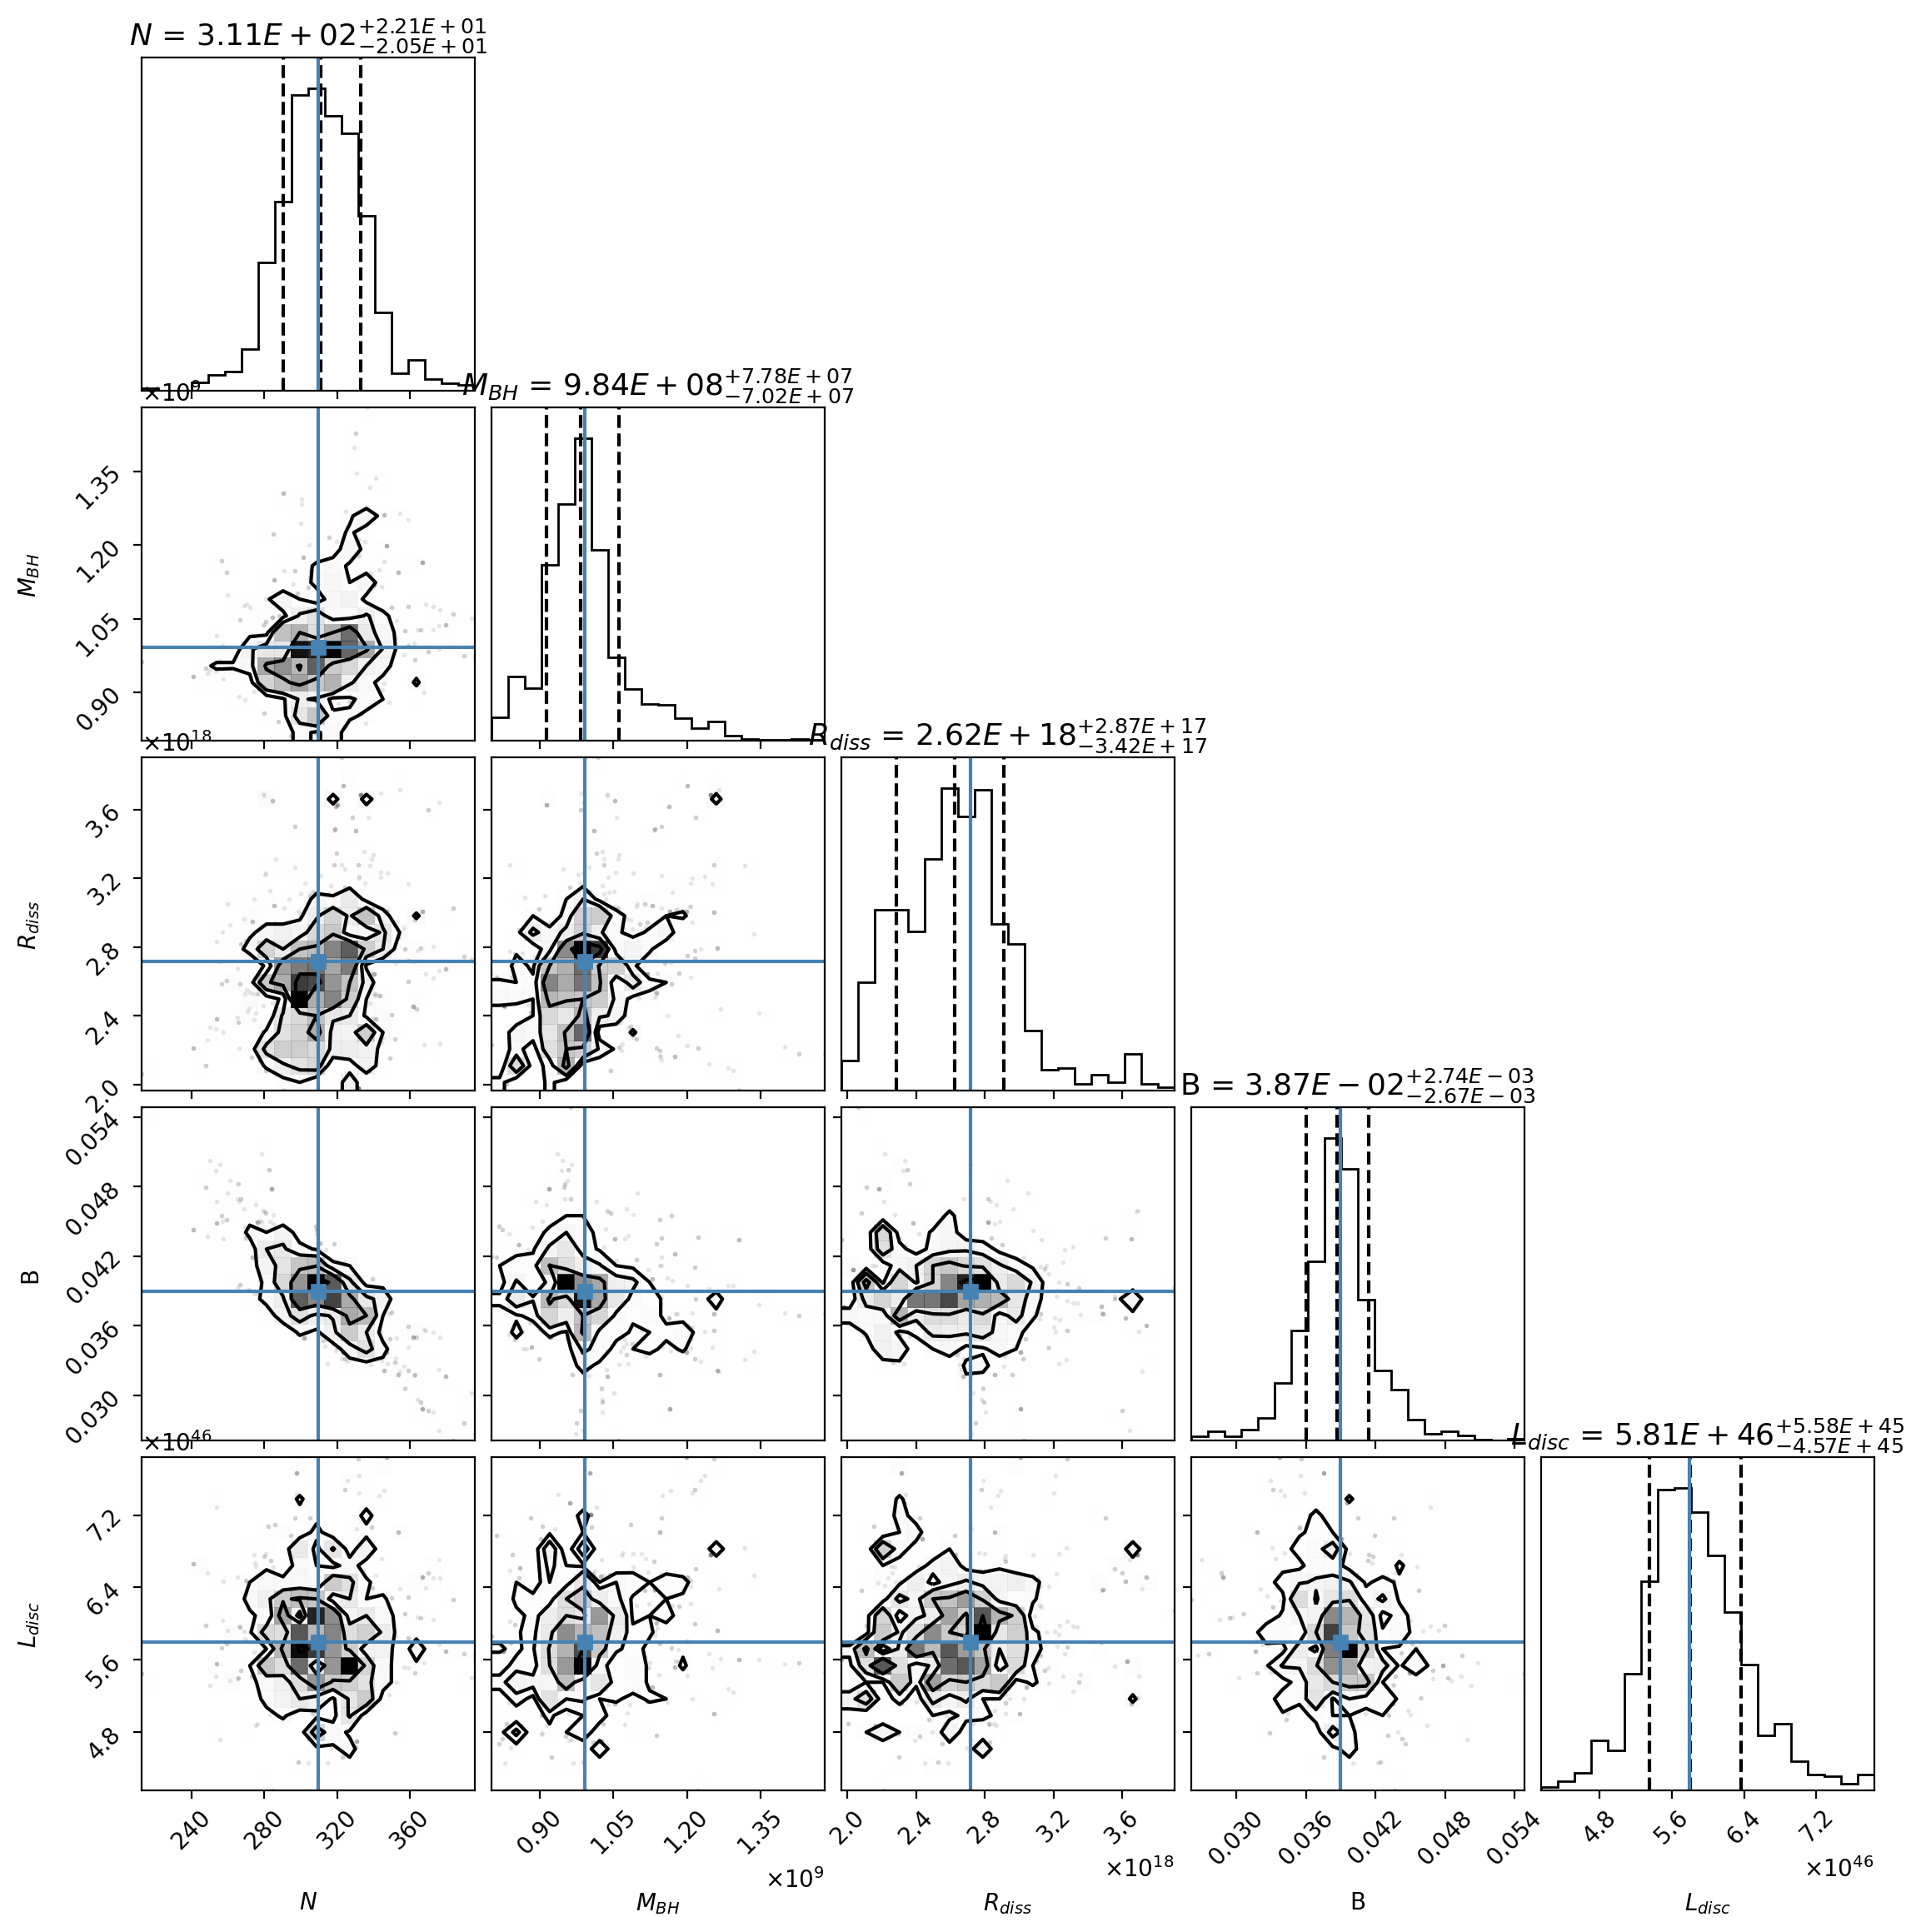

In [11]:
labes=[r'$N$',r'$M_{BH}$',r'$R_{diss}$','B',r'$L_{disc}$',r'$\Gamma$']
plt.rcParams['figure.dpi'] = 200
from corner import corner

f=corner(mcmc.samples,labels=labes, quantiles=(0.16, 0.5, 0.84),
       truths=mcmc.labels_start_val, show_titles = True, 
       title_fmt=".2E",title_kwargs=dict(fontsize=13),
       use_math_text=True)
mcmc.save('mcmc_3_1.pkl')

==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H


==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BL

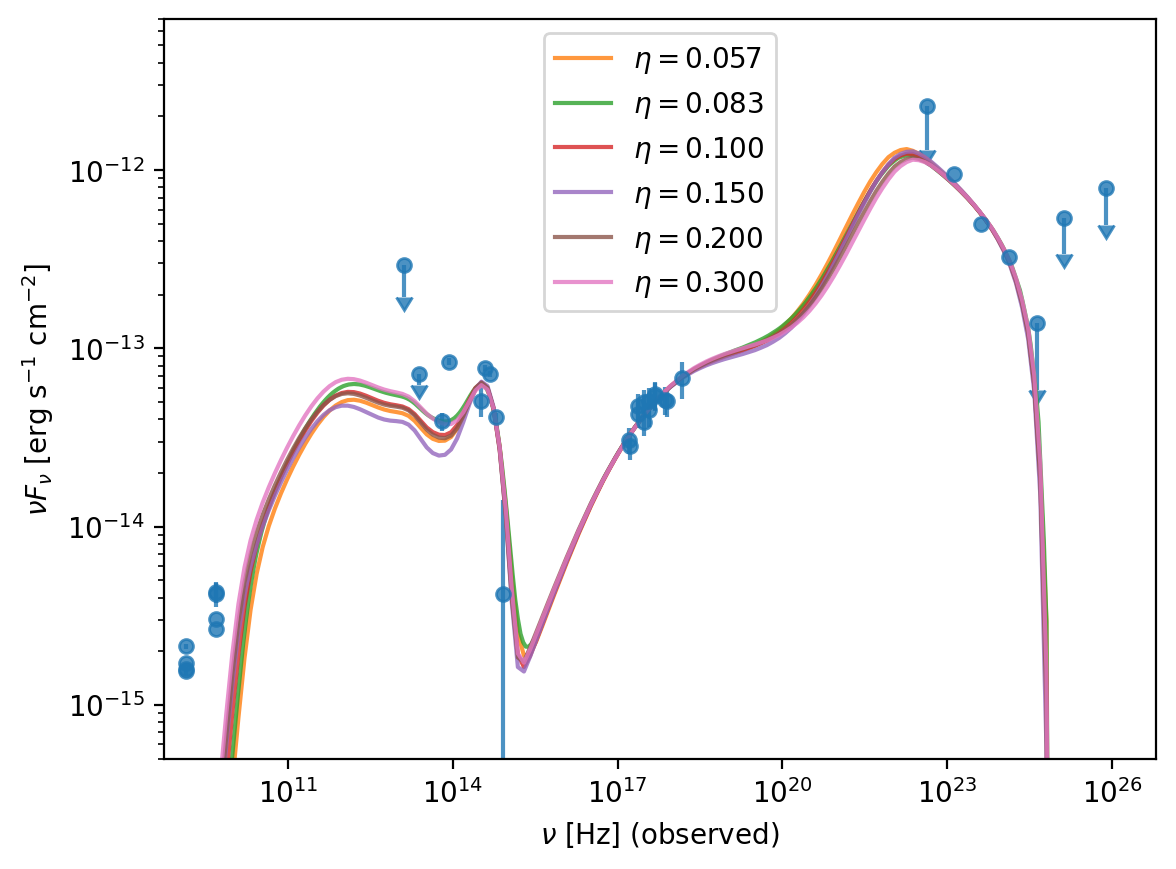

In [12]:
import pandas as pd
data_sed = pd.read_csv('sed2.txt', sep=" ", header=None)
data_sed.columns = ["x", "y", "y_err"]

x = data_sed['x'].to_numpy()
y = data_sed['y'].to_numpy()
y_err = data_sed['y_err'].to_numpy()
uplims = np.array([1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0], dtype=bool)
plt.errorbar(x, y, yerr=y_err,uplims=uplims,marker='o', markersize=5,linestyle='none', alpha=0.8)

my_jet_5=FitModel.load_model('fit_model_5_1.pkl')
nu5=my_jet_5.SED.nu
nuFnu5=my_jet_5.SED.nuFnu
plt.loglog(nu5,nuFnu5, label=r"$\eta=0.057$", alpha=0.8)
my_jet_8=Jet.load_model("/home/chema/Desktop/Astro&Cosmo/Thesis/JetSET/Model_A/prefit_SSD.pkl")
nu8=my_jet_8.SED.nu
nuFnu8=my_jet_8.SED.nuFnu
plt.loglog(nu8,nuFnu8, label=r"$\eta=0.083$", alpha=0.8)
my_jet_1=FitModel.load_model('fit_model_1_1.pkl')
nu1=my_jet_1.SED.nu
nuFnu1=my_jet_1.SED.nuFnu
plt.loglog(nu1,nuFnu1, label=r"$\eta=0.100$", alpha=0.8)
my_jet_1_5=FitModel.load_model('fit_model_1_5_1.pkl')
nu1=my_jet_1_5.SED.nu
nuFnu1=my_jet_1_5.SED.nuFnu
plt.loglog(nu1,nuFnu1, label=r"$\eta=0.150$", alpha=0.8)
my_jet_2=FitModel.load_model('fit_model_2_1.pkl')
nu2=my_jet_2.SED.nu
nuFnu2=my_jet_2.SED.nuFnu
plt.loglog(nu2,nuFnu2, label=r"$\eta=0.200$", alpha=0.8)
my_jet_3=FitModel.load_model('fit_model_3_1.pkl')
nu3=my_jet_3.SED.nu
nuFnu3=my_jet_3.SED.nuFnu
plt.loglog(nu3,nuFnu3, label=r"$\eta=0.300$", alpha=0.8)


plt.ylim(5e-16,7e-12)
plt.xlim(5.5849e+8,6.3096e26)
#plt.scatter(x,y)
plt.xlabel(r"$\nu$ [Hz] (observed)")
plt.ylabel(r"$\nu F_{\nu}$ [erg s$^{-1}$ cm$^{-2}$]")
plt.legend()
plt.savefig('etas.png')
plt.show()

==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5

--------------------------------------------------------------------------------
model description: 
--------------------------------------------------------------------------------
type: Jet
name: jet_leptonic  

electrons distribution:
 type: bkn  
 gamma energy grid size:  201
 gmin grid : 1.000000e+00
 gmax grid : 2.000000e+04
 normalization:  True
 log-values:  False
 ratio of cold protons to relativistic electrons: 1.000000e-01

accretion disk:
 disk Type: MultiBB
 L disk: 1.083540e+46 (erg/s)
 T disk: 2.736133e+04 (K)
 nu peak disk: 2.235916e+15 (Hz)
 Sw radius 3.140460e+14 (cm)
 L Edd. 1

--------------------------------------------------------------------------------
5 19.10636135109501
8 19.02661974912703
1 19.07511212131733
15 19.008601661917346
2 19.094575444397464
3 19.02513343371088


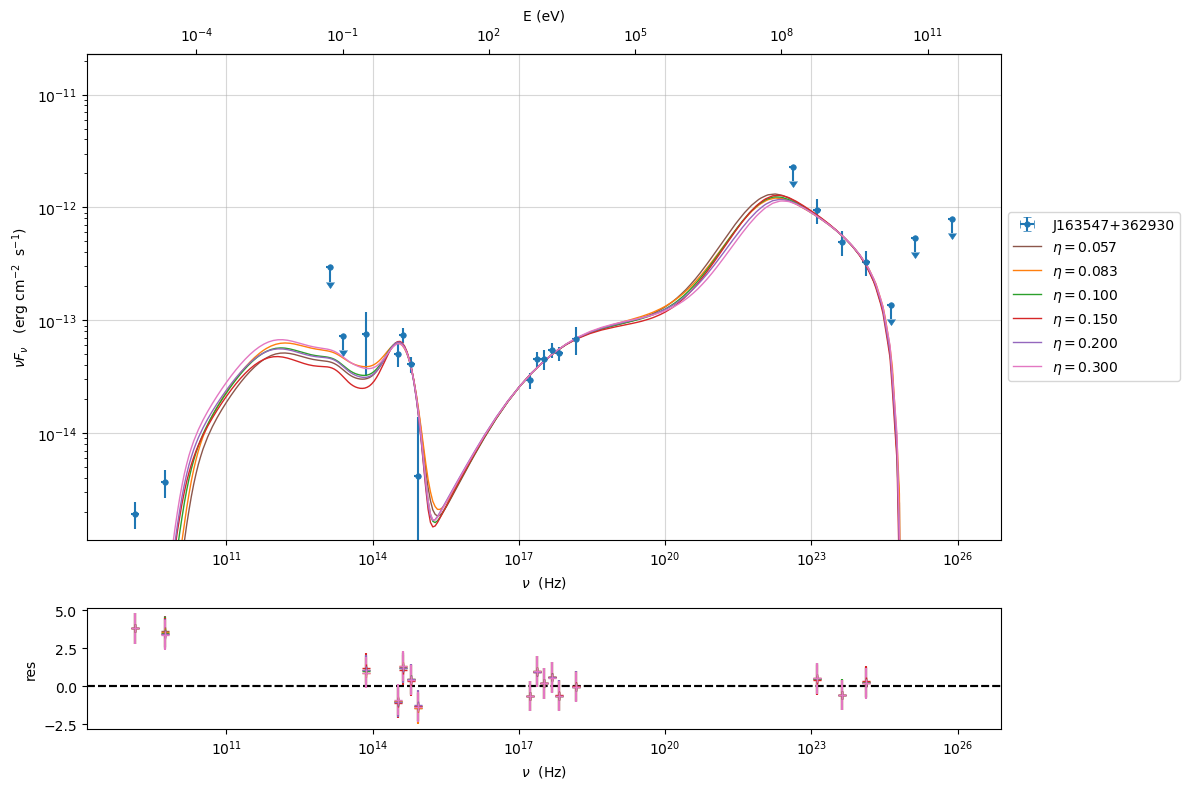

In [14]:
my_disc=Jet(name='jet_leptonic',electron_distribution='bkn',beaming_expr='bulk_theta')
my_disc.add_EC_component(['EC_Disk',"EC_DT","EC_BLR"],disk_type='MultiBB')
my_disc.add_user_par(name='theta_open',val=3,units='deg')
my_disc.make_dependent_par(par='R', depends_on=['R_H','theta_open'],
                              par_expr='np.tan((theta_open*np.pi/180))*R_H')
my_disc.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='3E17*(L_Disk/1E46)**0.5')
my_disc.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')
my_disc.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2E19*(L_Disk/1E46)**0.5')

gmin=1
gmax=20000
N=820.2068
gamma_break=812.2595
p=1.304039
p_1=3.347491
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.057
M_BH=1063287000
T_DT=836.6683
R_DT=2.081864E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=3.122796E+017
R_BLR_out=3.435076E+017
L_Disk=1.08354E+046
R=6.369806E+016
R_H5=1.215431E+018
B5=0.0670652
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=19.29969
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H5)
my_disc.set_par('B',val=B5)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_disc.show_model()
print("5",my_disc.get_beaming())
my_plot=my_disc.plot_model(label=r'$\eta = 0.057$',comp='Sum', frame="obs", sed_data=sed_data, color='#8c564b')
my_plot.add_residual_plot(my_disc,sed_data,color='#8c564b')

gmin=1.00
gmax=20000.00
N=702.2429
gamma_break=823.9845
p=1.374243
p_1=3.30019
T_DT=836.6683
R_DT=2.364663e+19
tau_DT=0.1
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.083
M_BH=999404000
tau_BLR=0.1
R_BLR_in=3.546995e+17
R_BLR_out=3.901695e+17
L_Disk=1.397908e+46
R=7.878364e+16
R_H8=1.503281e+18
B8=0.06719232
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H8)
my_disc.set_par('B',val=B8)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
print("8",my_disc.get_beaming())
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.083$',comp='Sum', frame="obs",color='#ff7f0e')
my_plot.add_residual_plot(my_disc,sed_data, color='#ff7f0e')

gmin=1
gmax=20000
N=441.8916
gamma_break=884.0911
p=1.310636
p_1=3.332407
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.1
M_BH=1086957000
T_DT=836.6683
R_DT=2.822991E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=4.234487E+017
R_BLR_out=4.657936E+017
L_Disk=1.99232E+046
R=9.558019E+016
R_H1=1.823779E+018
B1=0.04948838
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=18.03024
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H1)
my_disc.set_par('B',val=B1)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
print("1",my_disc.get_beaming())
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.100$',comp='Sum', frame="obs",color='#2ca02c')
my_plot.add_residual_plot(my_disc,sed_data,color='#2ca02c')


gmin=1
gmax=20000
N=385.7299
gamma_break=956.3584
p=1.300038
p_1=3.370652
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.15
M_BH=1152500000
T_DT=836.6683
R_DT=3.661328E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=5.491992E+017
R_BLR_out=6.041192E+017
L_Disk=3.351331E+046
R=1.102944E+017
R_H15=2.104542E+018
B15=0.03638931
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=17.25935
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H15)
my_disc.set_par('B',val=B15)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
print("15",my_disc.get_beaming())
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.150$',comp='Sum', frame="obs",color='#d62728')
my_plot.add_residual_plot(my_disc,sed_data, color='#d62728')

gmin=1
gmax=20000
N=463.8081
gamma_break=984.7883
p=1.408306
p_1=3.324933
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.2
M_BH=1110646000
T_DT=836.6683
R_DT=4.095981E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=6.143971E+017
R_BLR_out=6.758368E+017
L_Disk=4.194264E+046
R=1.221433E+017
R_H2=2.330634E+018
B2=0.03788442
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=18.42274
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H2)
my_disc.set_par('B',val=B2)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
print("2",my_disc.get_beaming())
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.200$',comp='Sum', frame="obs",color='#9467bd')
my_plot.add_residual_plot(my_disc,sed_data,color='#9467bd')

gmin=1
gmax=20000
N=309.5791
gamma_break=984.5516
p=1.390993
p_1=3.308097
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.3
M_BH=992224600
T_DT=836.6683
R_DT=4.813019E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=7.219528E+017
R_BLR_out=7.941481E+017
L_Disk=5.791287E+046
R=1.423178E+017
R_H3=2.715586E+018
B3=0.03898667
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.96541
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H3)
my_disc.set_par('B',val=B3)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
print("3",my_disc.get_beaming())
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.300$',comp='Sum', frame="obs", color="#e377c2")
my_plot.add_residual_plot(my_disc,sed_data,color="#e377c2")


#my_plot.setlim(x_min=10**14, x_max=10**15.85, y_min=10**43.699, y_max=10**46.2)
my_plot.save('etas_1.png')

==> par R is now depending on ['R_H', 'theta_open'] according to expr:R =
np.tan((theta_open*np.pi/180))*R_H
==> par R_BLR_in is now depending on ['L_Disk'] according to expr:R_BLR_in =
3E17*(L_Disk/1E46)**0.5
==> par R_BLR_out is now depending on ['R_BLR_in'] according to expr:R_BLR_out =
R_BLR_in*1.1
==> par R_DT is now depending on ['L_Disk'] according to expr:R_DT =
2E19*(L_Disk/1E46)**0.5


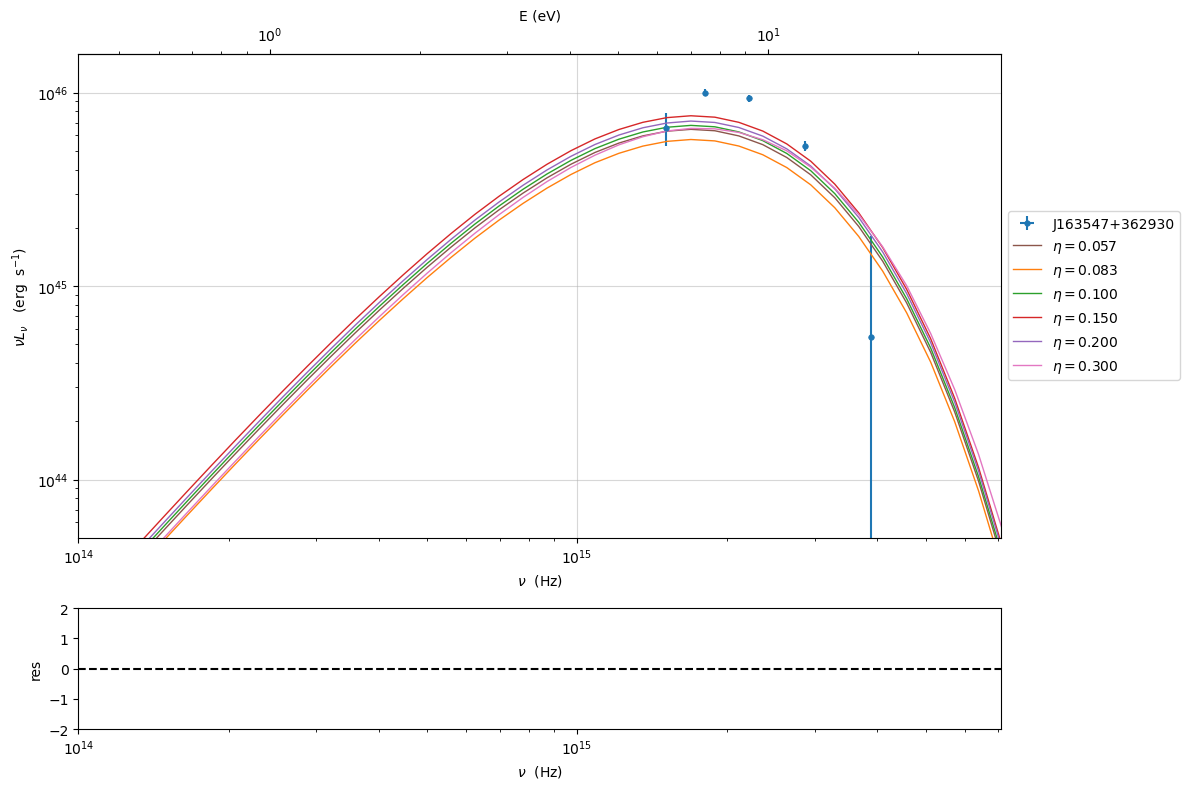

In [16]:
d=np.genfromtxt('disk.txt')
data=Data(n_rows=d.shape[0])
data.set_field('x',d[:,0])
data.set_field('y',d[:,1])
data.set_field('dy',value=d[:,2])
data.set_meta_data('z',3.647763)
data.set_meta_data('restframe','obs')
data.set_meta_data('data_scale','lin-lin')
data.set_meta_data('obj_name','J163547+362930')
sed_data=ObsData(data_table=data)

my_disc=Jet(name='JetLeptonic',electron_distribution='bkn',beaming_expr='bulk_theta')
my_disc.add_EC_component(['EC_Disk',"EC_DT","EC_BLR"],disk_type='MultiBB')
my_disc.add_user_par(name='theta_open',val=3,units='deg')
my_disc.make_dependent_par(par='R', depends_on=['R_H','theta_open'],
                              par_expr='np.tan((theta_open*np.pi/180))*R_H')
my_disc.make_dependent_par(par='R_BLR_in', depends_on=['L_Disk'], par_expr='3E17*(L_Disk/1E46)**0.5')
my_disc.make_dependent_par(par='R_BLR_out', depends_on=['R_BLR_in'], par_expr='R_BLR_in*1.1')
my_disc.make_dependent_par(par='R_DT', depends_on=['L_Disk'], par_expr='2E19*(L_Disk/1E46)**0.5')

gmin=1
gmax=20000
N=820.2068
gamma_break=812.2595
p=1.304039
p_1=3.347491
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.057
M_BH=1063287000
T_DT=836.6683
R_DT=2.081864E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=3.122796E+017
R_BLR_out=3.435076E+017
L_Disk=1.08354E+046
R=6.369806E+016
R_H5=1.215431E+018
B5=0.0670652
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=19.29969
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H5)
my_disc.set_par('B',val=B5)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(label=r'$\eta = 0.057$',comp='Disk', frame="src", sed_data=sed_data, color='#8c564b')
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1.00
gmax=20000.00
N=702.2429
gamma_break=823.9845
p=1.374243
p_1=3.30019
T_DT=836.6683
R_DT=2.364663e+19
tau_DT=0.1
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.083
M_BH=999404000
tau_BLR=0.1
R_BLR_in=3.546995e+17
R_BLR_out=3.901695e+17
L_Disk=1.397908e+46
R=7.878364e+16
R_H8=1.503281e+18
B8=0.06719232
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.94768
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H8)
my_disc.set_par('B',val=B8)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.083$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1
gmax=20000
N=441.8916
gamma_break=884.0911
p=1.310636
p_1=3.332407
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.1
M_BH=1086957000
T_DT=836.6683
R_DT=2.822991E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=4.234487E+017
R_BLR_out=4.657936E+017
L_Disk=1.99232E+046
R=9.558019E+016
R_H1=1.823779E+018
B1=0.04948838
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=18.03024
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H1)
my_disc.set_par('B',val=B1)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.100$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)


gmin=1
gmax=20000
N=385.7299
gamma_break=956.3584
p=1.300038
p_1=3.370652
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.15
M_BH=1152500000
T_DT=836.6683
R_DT=3.661328E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=5.491992E+017
R_BLR_out=6.041192E+017
L_Disk=3.351331E+046
R=1.102944E+017
R_H15=2.104542E+018
B15=0.03638931
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=17.25935
z_cosm=3.647763
theta_open=3


my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H15)
my_disc.set_par('B',val=B15)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.150$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1
gmax=20000
N=463.8081
gamma_break=984.7883
p=1.408306
p_1=3.324933
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.2
M_BH=1110646000
T_DT=836.6683
R_DT=4.095981E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=6.143971E+017
R_BLR_out=6.758368E+017
L_Disk=4.194264E+046
R=1.221433E+017
R_H2=2.330634E+018
B2=0.03788442
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=18.42274
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H2)
my_disc.set_par('B',val=B2)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.200$',comp='Disk', frame="src")
#my_plot.add_residual_plot(my_disc,sed_data)

gmin=1
gmax=20000
N=309.5791
gamma_break=984.5516
p=1.390993
p_1=3.308097
R_inner_Sw=11.69233
R_ext_Sw=62.39621
accr_eff=0.3
M_BH=992224600
T_DT=836.6683
R_DT=4.813019E+019
tau_DT=0.1
tau_BLR=0.1
R_BLR_in=7.219528E+017
R_BLR_out=7.941481E+017
L_Disk=5.791287E+046
R=1.423178E+017
R_H3=2.715586E+018
B3=0.03898667
NH_cold_to_rel_e=0.1
theta=3
BulkFactor=20.96541
z_cosm=3.647763
theta_open=3

my_disc.set_par('gmin',val=gmin)
my_disc.set_par('gmax',val=gmax)
my_disc.set_par('N',val=N)
my_disc.set_par('gamma_break',val=gamma_break)
my_disc.set_par('p',val=p)
my_disc.set_par('p_1',val=p_1)
my_disc.set_par('R_inner_Sw',val=R_inner_Sw)
my_disc.set_par('R_ext_Sw',val=R_ext_Sw)
my_disc.set_par('accr_eff',val=accr_eff)
my_disc.set_par('M_BH',val=M_BH)
my_disc.set_par('T_DT',val=T_DT)
my_disc.set_par('tau_DT',val=tau_DT)
my_disc.set_par('tau_BLR',val=tau_BLR)
my_disc.set_par('L_Disk',val=L_Disk)
my_disc.set_par('R_H',val=R_H3)
my_disc.set_par('B',val=B3)
my_disc.set_par('theta',val=theta)
my_disc.set_par('BulkFactor',val=BulkFactor)
my_disc.set_par('z_cosm',val=z_cosm)
my_disc.eval()
my_plot=my_disc.plot_model(my_plot,label=r'$\eta = 0.300$',comp='Disk', frame="src", color="#e377c2")

my_plot.setlim(x_min=10**14, x_max=10**15.85, y_min=10**43.699, y_max=10**46.2)
my_plot.save('disk_diff.png')

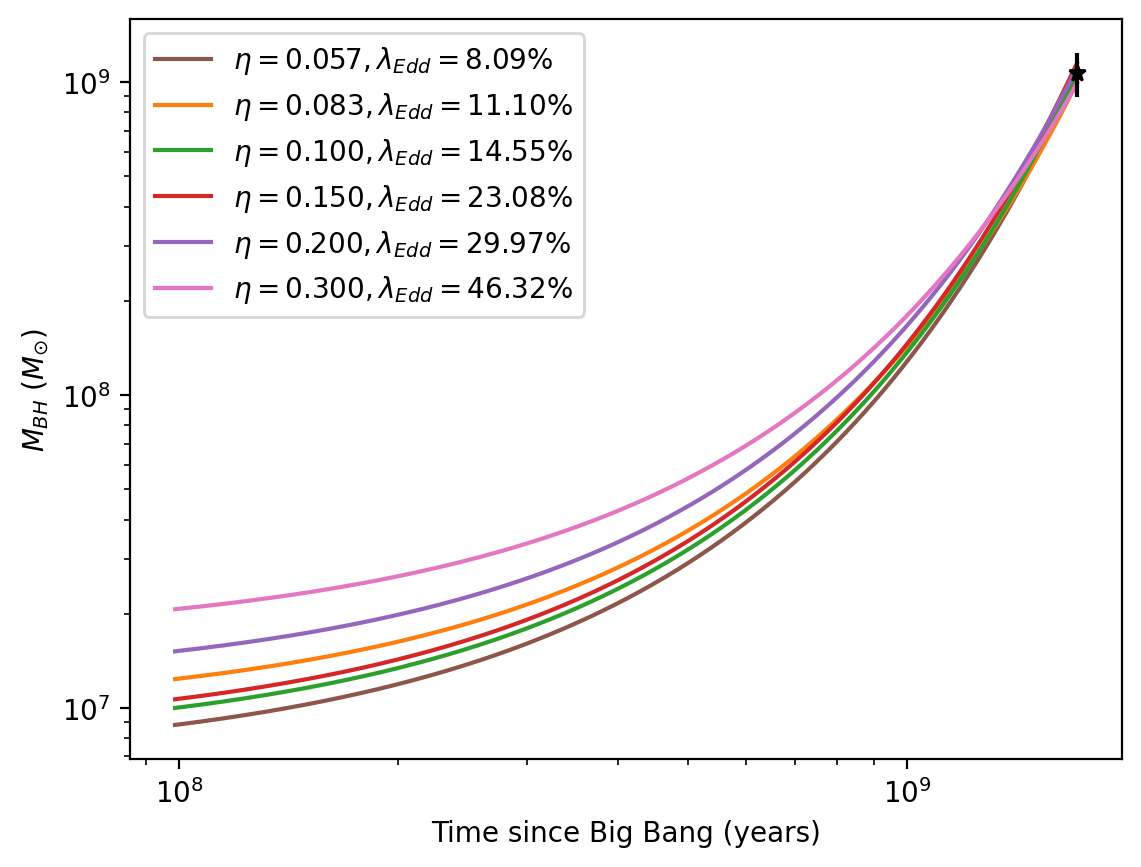

In [17]:
import numpy as np
eta=np.array([0.057,0.083,0.100,0.150,0.200,0.300])
L=np.array([1.083540E+46,1.397908e+46,1.992320E+46,3.351331E+46,4.194264E+46,5.791287E+46])
M_now=np.array([1.063287E+09,9.994040e+08,1.086957E+09,1.152500E+09,1.110646E+09,9.922246E+08])

#L_Edd= np.array([1.791997e+47,1.665730e+47,1.793196e+47,1.936942e+47,1.855799e+47,1.653667e+47]) #Given by JetSeT
L_Edd = (1.26e38)*M_now
ratio = L/L_Edd

tau = 0.45*(eta/(1-eta))*(1/ratio)*1e9 # Belladitta 2022; Shapiro 2005; Volonteri & Rees 2005

z30 = int(9.864900E+07) #Using the calculator https://www.astro.ucla.edu/~wright/CosmoCalc.html & Planck 2018
z3  = int(1.710e+09)

M_seed = M_now*np.exp((z30-z3)/tau)

t = np.linspace(z30,z3,1000) 

M = np.zeros((len(M_now),len(t)))
for i in range(len(M_now)):
    for j in range(len(t)):
        if j==0:
            M[i][j] = M_seed[i]            
        b = np.exp((j*(z3-z30)/1000)/(tau[i]))
        M[i][j] = M_seed[i]*(b)

        
plt.loglog(t,M[0], label=fr"$\eta={eta[0]:.3f}, \lambda_{{Edd}}={ratio[0]*100:.2f}\%$", color='#8c564b')
plt.loglog(t,M[1], label=fr"$\eta={eta[1]:.3f}, \lambda_{{Edd}}={ratio[1]*100:.2f}\%$", color='#ff7f0e')
plt.loglog(t,M[2], label=fr"$\eta={eta[2]:.3f}, \lambda_{{Edd}}={ratio[2]*100:.2f}\%$", color='#2ca02c')
plt.loglog(t,M[3], label=fr"$\eta={eta[3]:.3f}, \lambda_{{Edd}}={ratio[3]*100:.2f}\%$", color='#d62728')
plt.loglog(t,M[4], label=fr"$\eta={eta[4]:.3f}, \lambda_{{Edd}}={ratio[4]*100:.2f}\%$", color='#9467bd')
plt.loglog(t,M[5], label=fr"$\eta={eta[5]:.3f}, \lambda_{{Edd}}={ratio[5]*100:.2f}\%$", color='#e377c2')
plt.errorbar(z3,np.mean(M_now),yerr=np.std(M_now)*3, marker="*", color="k")
#plt.ylim(2e7, 2e10)
plt.xlabel("Time since Big Bang (years)")
plt.ylabel(r"$M_{BH}$ ($M_{\odot}$)")
plt.legend()
plt.savefig('BH_evolution.png')
plt.show()

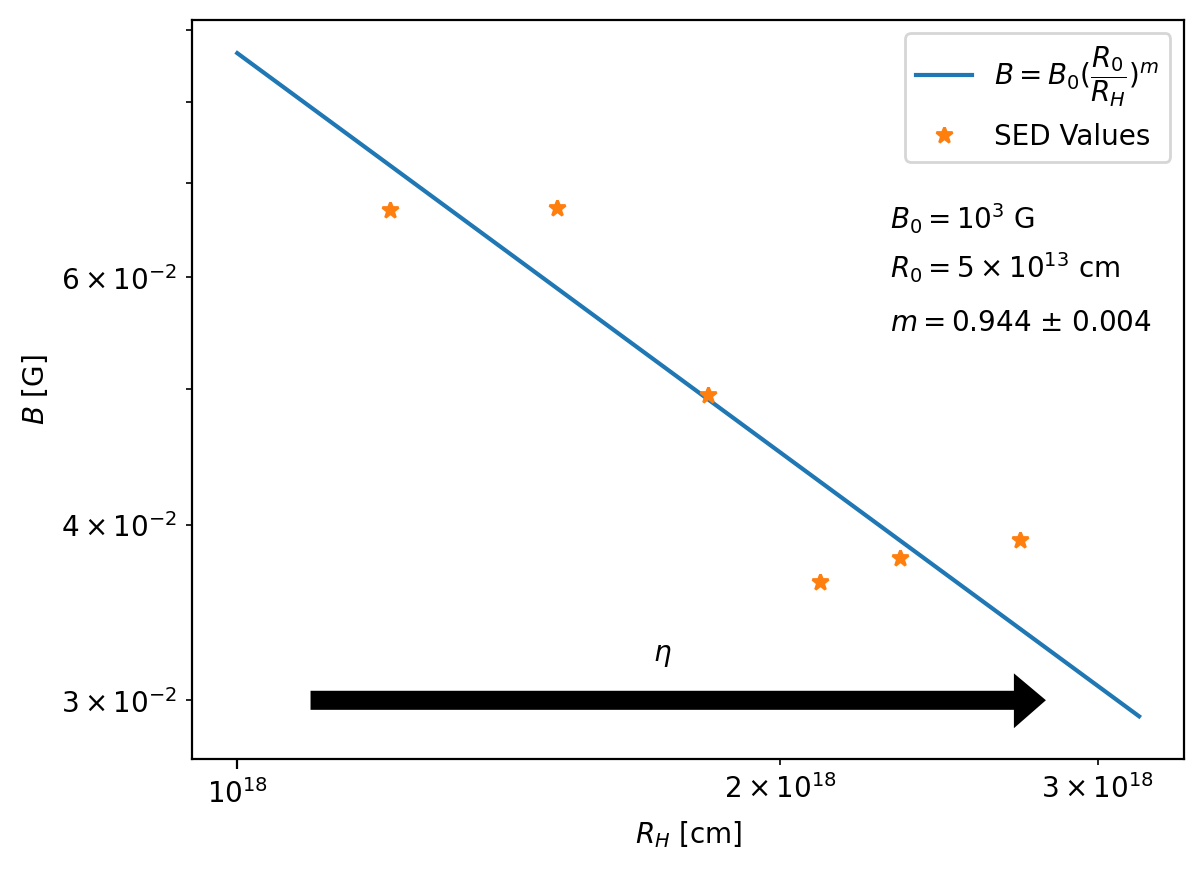

In [21]:
from scipy.optimize import curve_fit

def func(x,m):
    return 1e3*(5e13/x)**(m)

x = np.array([R_H5,R_H8,R_H1,R_H15,R_H2,R_H3])
y = np.array([B5,B8,B1,B15,B2,B3])

param, pcov = curve_fit(func, x, y, bounds=([0.90], [1.2]))

x2 = np.logspace(18,18.5,1000)
ans = func(x2,param[0])
m = np.round(param[0],3)
plt.loglog(x2,ans,label=fr'$B=B_0(\dfrac{{R_0}}{{R_{{H}}}})^{{m}}$')
plt.loglog(x,y,"*",label="SED Values")
plt.text(2.3e18,6.5e-2, r'$B_{0} = 10^{{3}}$ G')
plt.text(2.3e18,6e-2, r'$R_{0} = 5\times10^{{13}}$ cm')
plt.text(2.3e18,5.5e-2, fr'$m = {np.round(param[0],3)}$ $\pm$ {np.round(np.sqrt(float(np.diag(pcov))),3)}')
plt.arrow(x=1.1e18, y=0.03, dx=1.6e18, dy=0.0, width=.0008, color="k", head_length = 1e17) 
plt.annotate(r'$\eta$', xy = (1.7e18, 0.032))
plt.xlabel(r"$R_{H}$ [cm]")
plt.ylabel(r"$B$ [G]")
plt.savefig('BvR_H.png')
plt.legend()
plt.show()